#### REGRESSION LOGISTIQUE - Maud MAYOUSSE-AUMIPHIN / Youmna HASSANI / Mariam DIALLO-COUANT

## Problématique du projet : 

Quels sont les facteurs qui influencent la probabilité qu'une femme soit le principal apporteur de ressources dans son ménage?

### Installation de pyreadstat pour lire un fichier en SAS

In [720]:
pip install pandas sas7bdat pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [721]:
# importation des librairies nécéssaires pour réaliser le projet
import pandas as pd
from sas7bdat import SAS7BDAT
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

## 1. Importation des données

In [722]:
import pandas as pd
import pyreadstat

# Lire le fichier SAS
file_path= '/Users/maudaumiphin/Documents/Formation Data Analytics Sorbonne/Statistique/Projet/individus_ct2013.sas7bdat'
df, meta = pyreadstat.read_sas7bdat(file_path)

In [723]:
#afficher les 5 premières lignes du dataset pour découvrir comment sont présentées les données
df.head(5)

,C1C,C1D,IDENT_MEN,IDENT_IND,NPERS,NACTIFS,TYPMEN5,TYPMEN15,IR,REVMEN,...,lnaisd,lnaisper,lnaismer,natnaisper,natnaismer,nati,revannu_drap,revannu,revmensc,revmenscc_drap
0,2,2,0100019101000,010001910100002,2.0,1.0,2,22,1,2200.0,...,11,11,11,,,,1.0,1500.0,125.000000,1.0
1,,,0100083001000,010008300100002,2.0,2.0,5,52,2,2250.0,...,11,11,11,,,,-2.0,NaN,NaN,-2.0
2,2,2,0100084601000,010008460100002,5.0,2.0,4,42,1,2300.0,...,11,11,11,,,,1.0,0.0,0.000000,1.0
3,2,2,0100091701000,010009170100001,2.0,1.0,3,31,4,NaN,...,11,11,11,,,,1.0,3700.0,308.333333,1.0
4,1,1,0100091801000,010009180100001,1.0,1.0,1,10,1,1200.0,...,11,11,11,,,,1.0,15000.0,1250.000000,1.0


In [724]:
df.shape

(33673, 541)

Le jeu de données contient 541 colonnes et 33673 lignes. Nous constatons que ce jeu de données est très grand et qu'on va le nettoyer, nous allons ainsi explorer les données pour comprendre mieux comment il est réparti.

In [725]:
df.describe()

,NPERS,NACTIFS,REVMEN,REVMENMN,REVMENMX,COEFFUC,REVMENUC,REVMENMNUC,REVMENMXUC,CJACTOCCUP,...,pondqaa,duree_cessation,tps_interim,tps_contrat,anciennete,debut_contrat,revannu_drap,revannu,revmensc,revmenscc_drap
count,33673.000000,33673.000000,32173.000000,32173.000000,32173.000000,33673.000000,32173.000000,32173.000000,32173.000000,24020.000000,...,31851.000000,1060.000000,411.000000,3362.000000,33611.000000,3011.000000,33673.000000,2.255000e+03,30050.000000,33673.000000
mean,2.943248,1.769370,3372.633233,3227.882106,3517.176732,1.842678,1894.380770,1817.507896,1971.135723,0.792381,...,836.183769,119.388208,43.106149,13.388559,166.665348,14.142478,0.002524,2.259101e+04,1833.085338,0.727378
std,1.374929,0.651745,2561.628060,2418.829667,2776.193568,0.563405,1382.905145,1308.637369,1495.651246,0.405611,...,1193.644318,120.290571,54.331871,21.469958,134.526668,32.690921,0.433400,8.756368e+04,2947.920061,0.802025
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.333333,1.000000,0.000000,...,5.009889,1.000000,0.032787,0.000000,0.000000,0.000000,-2.000000,0.000000e+00,0.000000,-2.000000
25%,2.000000,1.000000,2000.000000,2000.000000,2000.000000,1.500000,1238.095238,1200.000000,1250.000000,1.000000,...,258.922885,30.500000,8.000000,3.000000,51.000000,3.000000,0.000000,1.500000e+03,1200.000000,1.000000
50%,3.000000,2.000000,3000.000000,3000.000000,3000.000000,1.800000,1666.666667,1600.000000,1666.666667,1.000000,...,551.715784,91.500000,24.000000,8.000000,144.000000,5.000000,0.000000,1.100000e+04,1598.500000,1.000000
75%,4.000000,2.000000,4000.000000,4000.000000,4000.000000,2.100000,2222.222222,2111.111111,2300.000000,1.000000,...,937.369953,183.000000,60.000000,12.000000,264.000000,14.000000,0.000000,2.500000e+04,2100.000000,1.000000
max,18.000000,7.000000,95000.000000,95000.000000,95000.000000,7.900000,60000.000000,60000.000000,60000.000000,1.000000,...,24820.028478,366.000000,444.000000,432.000000,756.000000,564.000000,1.000000,3.800000e+06,316666.666667,1.000000


76 colonnes ont des données numériques mais avec une répartition des données qui sont différentes ce qui signifie que les données ne suivent pas la même distribution.

In [726]:
# Liste des noms de colonnes
columns_list = df.columns.tolist()

# Affichage des noms de colonnes
print(columns_list)

['C1C', 'C1D', 'IDENT_MEN', 'IDENT_IND', 'NPERS', 'NACTIFS', 'TYPMEN5', 'TYPMEN15', 'IR', 'REVMEN', 'REVMENMN', 'REVMENMX', 'COEFFUC', 'REVMENUC', 'REVMENMNUC', 'REVMENMXUC', 'CJSITUA', 'CJACTOCCUP', 'SEXE', 'MNAIS', 'ANAIS', 'AGE', 'AGEQ', 'LNAIS', 'DEPNAIS', 'NAIS7', 'ANARRIV', 'AGARRIV', 'COUPLE', 'COUPLRP', 'CONJOINT', 'ETAMATRI', 'PACS', 'ENFANT', 'LIEN_01', 'LIEN_02', 'LIEN_03', 'LIEN_04', 'LIEN_05', 'LIEN_06', 'LIEN_07', 'LIEN_08', 'LIEN_09', 'LIEN_10', 'LIEN_11', 'LIEN_12', 'LIEN_13', 'LIEN_14', 'LIEN_15', 'LIEN_16', 'LIEN_17', 'LIEN_18', 'LIEN_19', 'LIEN_20', 'TYPOLOG', 'IPROPLOC', 'AUTLOG', 'PRACT', 'IPRAN', 'LIENPREF', 'FAMPRINC', 'SITUA', 'TRAREF', 'PASTRA', 'RABS', 'RABSP', 'RABSPU', 'AIDFAM', 'INFORM', 'MER1E', 'PER1E', 'NOIK1', 'NOIK2', 'CJENQUETE', 'NBENFM3', 'NBENF3A17', 'NBENF18P', 'TOTREVEN', 'ITOTREV', 'TRANCHRE', 'EREG', 'NBSAL', 'NBSALAID', 'ENCADR', 'TITPUB', 'DUDET', 'DUDETU', 'DEBDETM', 'DEBDETA', 'TPSINT', 'TPSINTU', 'RDET', 'DATANT', 'DAMOIS', 'LIEUW', 'TRAJE

Afin d'uniformiser le nom des colonnes et pour éviter les erreurs, nous passons les noms des colonnes en majuscule

In [727]:
def passer_colonnes_en_majuscules(df):
    df.columns = df.columns.str.upper()
    return df

# Exemple d'utilisation
# Supposons que df est votre DataFrame
df = passer_colonnes_en_majuscules(df)

In [728]:
# Liste des noms de colonnes
columns_list = df.columns.tolist()

# Affichage des noms de colonnes
print(columns_list)

['C1C', 'C1D', 'IDENT_MEN', 'IDENT_IND', 'NPERS', 'NACTIFS', 'TYPMEN5', 'TYPMEN15', 'IR', 'REVMEN', 'REVMENMN', 'REVMENMX', 'COEFFUC', 'REVMENUC', 'REVMENMNUC', 'REVMENMXUC', 'CJSITUA', 'CJACTOCCUP', 'SEXE', 'MNAIS', 'ANAIS', 'AGE', 'AGEQ', 'LNAIS', 'DEPNAIS', 'NAIS7', 'ANARRIV', 'AGARRIV', 'COUPLE', 'COUPLRP', 'CONJOINT', 'ETAMATRI', 'PACS', 'ENFANT', 'LIEN_01', 'LIEN_02', 'LIEN_03', 'LIEN_04', 'LIEN_05', 'LIEN_06', 'LIEN_07', 'LIEN_08', 'LIEN_09', 'LIEN_10', 'LIEN_11', 'LIEN_12', 'LIEN_13', 'LIEN_14', 'LIEN_15', 'LIEN_16', 'LIEN_17', 'LIEN_18', 'LIEN_19', 'LIEN_20', 'TYPOLOG', 'IPROPLOC', 'AUTLOG', 'PRACT', 'IPRAN', 'LIENPREF', 'FAMPRINC', 'SITUA', 'TRAREF', 'PASTRA', 'RABS', 'RABSP', 'RABSPU', 'AIDFAM', 'INFORM', 'MER1E', 'PER1E', 'NOIK1', 'NOIK2', 'CJENQUETE', 'NBENFM3', 'NBENF3A17', 'NBENF18P', 'TOTREVEN', 'ITOTREV', 'TRANCHRE', 'EREG', 'NBSAL', 'NBSALAID', 'ENCADR', 'TITPUB', 'DUDET', 'DUDETU', 'DEBDETM', 'DEBDETA', 'TPSINT', 'TPSINTU', 'RDET', 'DATANT', 'DAMOIS', 'LIEUW', 'TRAJE

In [729]:
# Je souhaite obtenir les types de données des colonnes
dtypes = df.dtypes 

# Je souhaite grouper les colonnes par types de données et les compter
dtypes_count = dtypes.value_counts()

# On affiche les résultats
print(dtypes_count) # on s'aperçoit que nous avons seulement deux types : object ou float

# - Alternative -
for dtype, count in dtypes_count.items():
    columns_of_type = dtypes[dtypes == dtype].index.tolist()
    print(f"\nType: {dtype} - Count: {count}")
    print(columns_of_type)


object     465
float64     76
Name: count, dtype: int64

Type: object - Count: 465
['C1C', 'C1D', 'IDENT_MEN', 'IDENT_IND', 'TYPMEN5', 'TYPMEN15', 'IR', 'CJSITUA', 'SEXE', 'AGEQ', 'LNAIS', 'DEPNAIS', 'NAIS7', 'COUPLE', 'COUPLRP', 'CONJOINT', 'ETAMATRI', 'PACS', 'ENFANT', 'LIEN_01', 'LIEN_02', 'LIEN_03', 'LIEN_04', 'LIEN_05', 'LIEN_06', 'LIEN_07', 'LIEN_08', 'LIEN_09', 'LIEN_10', 'LIEN_11', 'LIEN_12', 'LIEN_13', 'LIEN_14', 'LIEN_15', 'LIEN_16', 'LIEN_17', 'LIEN_18', 'LIEN_19', 'LIEN_20', 'TYPOLOG', 'IPROPLOC', 'AUTLOG', 'PRACT', 'IPRAN', 'LIENPREF', 'FAMPRINC', 'SITUA', 'TRAREF', 'PASTRA', 'RABS', 'RABSPU', 'AIDFAM', 'INFORM', 'MER1E', 'PER1E', 'CJENQUETE', 'ITOTREV', 'TRANCHRE', 'EREG', 'NBSAL', 'NBSALAID', 'ENCADR', 'TITPUB', 'DUDETU', 'TPSINTU', 'RDET', 'LIEUW', 'CLIENT', 'FRANCE', 'DRH', 'DIFPAYE', 'NBSALA', 'AUTRETA', 'NBSALB', 'REVTRSAL', 'REVTRNSA', 'PAYECOM', 'TPP', 'TXTPPB', 'RAISTP', 'REPOS', 'SAMEDI', 'DIMANCHE', 'DIMCOMP', 'DETHOR', 'HORANGT', 'PREMOIS', 'PRESEM', 'PREJOUR',

Selon le dictionnaire de données, il n'existe pas de valeurs catégorielle dans notre jeu de données, ainsi nous allons transformer les variables object en float afin de pouvoir les exploiter.

In [730]:
# Liste des colonnes à convertir en données numériques
columns_to_convert = [
     'C1C', 'C1D', 'IDENT_MEN', 'IDENT_IND', 'NPERS', 'NACTIFS', 'TYPMEN5', 'TYPMEN15', 'IR', 'REVMEN', 'REVMENMN', 'REVMENMX', 'COEFFUC', 'REVMENUC', 'REVMENMNUC', 'REVMENMXUC', 'CJSITUA', 'CJACTOCCUP', 'SEXE', 'MNAIS', 'ANAIS', 'AGE', 'AGEQ', 'LNAIS', 'DEPNAIS', 'NAIS7', 'ANARRIV', 'AGARRIV', 'COUPLE', 'COUPLRP', 'CONJOINT', 'ETAMATRI', 'PACS', 'ENFANT', 'LIEN_01', 'LIEN_02', 'LIEN_03', 'LIEN_04', 'LIEN_05', 'LIEN_06', 'LIEN_07', 'LIEN_08', 'LIEN_09', 'LIEN_10', 'LIEN_11', 'LIEN_12', 'LIEN_13', 'LIEN_14', 'LIEN_15', 'LIEN_16', 'LIEN_17', 'LIEN_18', 'LIEN_19', 'LIEN_20', 'TYPOLOG', 'IPROPLOC', 'AUTLOG', 'PRACT', 'IPRAN', 'LIENPREF', 'FAMPRINC', 'SITUA', 'TRAREF', 'PASTRA', 'RABS', 'RABSP', 'RABSPU', 'AIDFAM', 'INFORM', 'MER1E', 'PER1E', 'NOIK1', 'NOIK2', 'CJENQUETE', 'NBENFM3', 'NBENF3A17', 'NBENF18P', 'TOTREVEN', 'ITOTREV', 'TRANCHRE', 'EREG', 'NBSAL', 'NBSALAID', 'ENCADR', 'TITPUB', 'DUDET', 'DUDETU', 'DEBDETM', 'DEBDETA', 'TPSINT', 'TPSINTU', 'RDET', 'DATANT', 'DAMOIS', 'LIEUW', 'TRAJET', 'CLIENT', 'POURCLIEN', 'ANETA', 'FRANCE', 'DRH', 'DIFPAYE', 'NBSALA', 'AUTRETA', 'NBSALB', 'REVTRSAL', 'REVTRNSA', 'PAYECOM', 'TPP', 'TXTPPB', 'RAISTP', 'HH', 'HHTOT', 'JOURTR', 'REPOS', 'SAMEDI', 'NBSAME', 'DIMANCHE', 'NBDIMA', 'DIMCOMP', 'DETHOR', 'HORANGT', 'PREMOIS', 'PRESEM', 'PREJOUR', 'HORVAR', 'PERIODE', 'DEBUTM', 'FINM', 'DEBUT2H', 'DEBUT2M', 'FIN2H', 'FIN2M', 'CONTROLE', 'PTMATIN', 'SOIR', 'NUIT', 'NBNUIT', 'NUICOMP', 'HSUP', 'HSUPCOMP', 'ASTREINTE', 'NBASTR', 'ASTRCOMP', 'JOINDRE', 'COMBIEN', 'MAISON', 'TPMAISON', 'MISSION', 'CONGE', 'CONGEU', 'LIBCONG', 'ARETMAL', 'ATMAL', 'PRISCONG', 'URGFAM1', 'CVFVP', 'AIDHID', 'CWDEBOU', 'CWPOSTU', 'CWDEPLA', 'CWLOURD', 'CWMVT', 'CWVIB', 'CWVUE', 'CWLETR', 'CWMINUS', 'CWVISO', 'HYGSAL', 'HYGCHUMI', 'HYGCOUR', 'HYGODEUR', 'HYGCHAUD', 'HYGFROID', 'HYGSANI', 'HYGVUE', 'HYGPRIV', 'CONDUITE', 'NBRKM', 'NBRKMU', 'SECFUPOU', 'SECTOXNO', 'SECINFEC', 'SECACCID', 'SECROUT', 'ENTENDR', 'EPI', 'EPIUTIL', 'RISK', 'RISKINF1', 'RISKINF2', 'RISKINF3', 'RISKINF4', 'RISKINF5', 'FORMSEC', 'DOCEVAL', 'ASSOEVAL', 'MEDECIN', 'VISITUNI', 'SECURITE', 'APPLIQ', 'APPLINSP', 'ACCIDT', 'ACTUACC1', 'ACTUACC2', 'DATACCM', 'DATACCA', 'ARRET', 'NBJARR', 'SIGN', 'INDEMNI', 'REDRISK', 'RWDEP', 'RWCAD', 'RWTECH', 'RWCOLEG', 'RWNORMH', 'RWNORMJ', 'RWDEM', 'RWDEMAND', 'RWSURV', 'RWINFO', 'CHAINE', 'DEPECH', 'DEBORD', 'INTERACT', 'OBJECTIF', 'OBJMODIF', 'OBJATTEIN', 'DELAIS', 'PUBLIC', 'PUBLIC1', 'PUBLIC2', 'POLY', 'POLYQUAL', 'POLYERR', 'INTERUP', 'REMPLAS', 'COMMENT', 'STARK', 'INCIDENT', 'PROCEDUR', 'REPETE', 'CYCLE', 'MONOTON', 'NOUVELLE', 'RISQUAL', 'RISFINA', 'RISDANG', 'RISEMPL', 'RESTMAI', 'RESTMAIN', 'SIEG34', 'COMPUTIL1', 'COMPUTIL2', 'AIDCHEF', 'AIDCOLL', 'AIDAUTR', 'AIDEXT', 'AIDOM', 'TRAVSEUL', 'CHGTCOLL', 'COLLECT', 'REUNION', 'ACCHEF', 'DICHEF', 'ACCOL', 'DICOL', 'TENSION1', 'TENSION2', 'TENSION3', 'TENSION4', 'DETRESSE', 'CALMER', 'CONTRAD', 'EVA', 'EVACRIT', 'SYNDIC', 'SYNDICNS', 'DISCURP', 'CHSCT', 'CORRTAN', 'CORRINF', 'CORRCOP', 'CORRCOL', 'CORRLOG', 'CORRMAT', 'CORRFORM', 'TELEPORT', 'MICRO1', 'MICRO2', 'MEL', 'INTRANET', 'MELDOM', 'RESDOM', 'INFOH', 'INFOHU1', 'INFOHU2', 'CRAINTE', 'METIER', 'NOCHOM', 'TENIR', 'SOUHAIT', 'FORTMOD1', 'FORTMOD2', 'FORTMOD3', 'FORTMOD4', 'FORTMOD5', 'FORTMOD6', 'FORTMOD7', 'CHANGOP', 'CHGTINFO', 'CHGTCONS', 'CHGTINFL', 'BSANTE', 'BCHRO', 'BLIMI', 'BRECO', 'ACTIP', 'STATUTP', 'ACTIM', 'STATUTM', 'ETUDIPL', 'FINETUD', 'FINETUDU', 'TCHOL', 'TCHOC', 'TSAN', 'TINA', 'TINDEP', 'TINTERIM', 'TCDD', 'NBEMP', 'STATUTA', 'DEMPRO', 'DEMENA', 'LANG1', 'LANG2', 'LANG4', 'REPQAA', 'INTRO', 'A1A', 'A1B', 'A1C', 'A1D', 'A1E', 'A1F', 'A1G', 'A1H', 'A1I', 'A1J', 'A1K', 'A1L', 'A2A', 'A2B', 'A2C', 'A2D', 'A2E', 'A2F', 'A2G', 'A2H', 'A2I', 'A2J', 'A2K', 'A2L', 'B1A', 'B1B', 'B1C', 'B1D', 'B1E', 'B1F', 'B1G', 'B1H', 'B1I', 'B1J', 'B2A', 'B2B', 'B2C', 'B2D', 'B3A', 'B3B', 'B3C', 'B3D', 'B3E', 'B3F', 'B3G', 'B3H', 'B4A', 'B4B', 'B4C', 'B4D', 'B5A', 'B5B', 'B5C', 'B5D', 'B5E', 'B5F', 'B6', 'C1A', 'C1B', 'C1E', 'C2', 'CHERCHEUR', 'V', 'STATUTEXT', 'STATUT', 'AUTSAL', 'CLASSIF', 'TYPEMPLOI', 'FONCTION', 'AIDE1E', 'AIDE2E', 'AFTYPTRAV', 'ACTIVFIN', 'SUPH', 'SUPA', 'OPA', 'DEBUTH', 'FINH', 'INTERNET', 'NAIP', 'NAIM', 'NATIO1NA', 'NATIO1NB', 'ETUDES', 'FORMINIT', 'DIPLOME', 'TOTREVEN_DRAP', 'DUDET_DRAP', 'DEBDETM_DRAP', 'DEBDETA_DRAP', 'TPSINT_DRAP', 'DATANT_DRAP', 'DAMOIS_DRAP', 'TRAJET_DRAP', 'POURCLIEN_DRAP', 'ANETA_DRAP', 'REVMENS_DRAP', 'REVMENS', 'HH_DRAP', 'HHTOT_DRAP', 'JOURTR_DRAP', 'NBSAME_DRAP', 'NBDIMA_DRAP', 'DEBUTH_DRAP', 'DEBUTM_DRAP', 'FINH_DRAP', 'FINM_DRAP', 'DEBUT2H_DRAP', 'DEBUT2M_DRAP', 'FIN2H_DRAP', 'FIN2M_DRAP', 'NBNUIT_DRAP', 'NBASTR_DRAP', 'COMBIEN_DRAP', 'TPMAISON_DRAP', 'CONGE_DRAP', 'ATMAL_DRAP', 'NBRKM_DRAP', 'INFOH_DRAP', 'RESTMAIN_DRAP', 'DATACCM_DRAP', 'DATACCA_DRAP', 'NBJARR_DRAP', 'CHAMP_EMPL', 'QUAL_EMPLX', 'QUAL_ADR', 'QUAL_SIRET', 'QUALITE_VOLET', 'TYPEXTFP', 'PREVIS', 'KMANNU', 'TPSINFO', 'NATIO', 'IMMI', 'PERIMMI', 'MERIMMI', 'LIENMIG', 'AGFINETU', 'ANFINETU', 'WHO', 'NBSALENTC', 'ELIGEXT', 'CSE', 'CSEPER', 'CSEMER', 'CSEDEB', 'PE', 'PROFPER', 'PROFMER', 'PROFDEB', 'DOUBLONTYPE', 'NUMFA_SOURCE', 'SSECH_SOURCE', 'IDENT_FA_SOURCE', 'IDENT_LOG_SOURCE', 'IDENT_MEN_SOURCE', 'IDENT_IND_SOURCE', 'RGES', 'NUMFA', 'SSECH', 'LE', 'EC', 'BS', 'IDENT_FA', 'IDENT_LOG', 'PEUN', 'PEUN10', 'PONDCAL', 'PONDQAA', 'TYPREPQAA', 'DUREE_CESSATION', 'CHAMP_CT2005', 'MILITAIRE', 'CSEI', 'CSER', 'CSERMER', 'CSERPER', 'CSERDEB', 'FAP225', 'FAP87', 'NAF17', 'NAF4', 'NUMENQ_ANON', 'REGION', 'TPS_INTERIM', 'TPS_CONTRAT', 'ANCIENNETE', 'DEBUT_CONTRAT', 'CONGETR', 'NAF38', 'LNAISD', 'LNAISPER', 'LNAISMER', 'NATNAISPER', 'NATNAISMER', 'NATI', 'REVANNU_DRAP', 'REVANNU', 'REVMENSC', 'REVMENSCC_DRAP']

# Convertir les colonnes en données numériques
for col in columns_to_convert:
    # Utilisez pd.to_numeric pour les colonnes avec des nombres en string
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' pour gérer les erreurs

In [731]:
df.dtypes

C1C                 float64
C1D                 float64
IDENT_MEN             int64
IDENT_IND             int64
NPERS               float64
NACTIFS             float64
TYPMEN5               int64
TYPMEN15              int64
IR                    int64
REVMEN              float64
REVMENMN            float64
REVMENMX            float64
COEFFUC             float64
REVMENUC            float64
REVMENMNUC          float64
REVMENMXUC          float64
CJSITUA             float64
CJACTOCCUP          float64
SEXE                  int64
MNAIS               float64
ANAIS               float64
AGE                 float64
AGEQ                  int64
LNAIS                 int64
DEPNAIS             float64
NAIS7               float64
ANARRIV             float64
AGARRIV             float64
COUPLE                int64
COUPLRP               int64
CONJOINT            float64
ETAMATRI              int64
PACS                float64
ENFANT                int64
LIEN_01               int64
LIEN_02             

Vérification du formattage 

Le formatage a été réussi.

## 2. Exploration des données & Nettoyage des données

In [732]:
# Fonction pour générer une phrase avec les colonnes supprimées
def generer_phrase_colonnes_supprimees(colonnes_supprimees):
    if len(colonnes_supprimees) == 0:
        return "Aucune colonne n'a été supprimée."
    elif len(colonnes_supprimees) == 1:
        return f"La colonne supprimée est : {colonnes_supprimees[0]}"
    else:
        colonnes_str = ', '.join(colonnes_supprimees[:-1]) + ' et ' + colonnes_supprimees[-1]
        return f"Les colonnes supprimées sont : {colonnes_str}"

# Supprimer les colonnes où toutes les valeurs sont manquantes
df_sans_colonnes_vides = df.dropna(axis=1, how='all')

# Trouver les colonnes supprimées
colonnes_vides = df.columns[df.isna().all()]

# Afficher les colonnes supprimées et le nouveau DataFrame
phrase_colonnes_supprimees = generer_phrase_colonnes_supprimees(colonnes_vides.tolist())
print(phrase_colonnes_supprimees)
print(df_sans_colonnes_vides.head())

Les colonnes supprimées sont : LIEN_19, LIEN_20, QUAL_EMPLX, QUAL_ADR, QUAL_SIRET, QUALITE_VOLET, DOUBLONTYPE, FAP225 et FAP87
   C1C  C1D     IDENT_MEN       IDENT_IND  NPERS  NACTIFS  TYPMEN5  TYPMEN15  \
0  2.0  2.0  100019101000  10001910100002    2.0      1.0        2        22   
1  NaN  NaN  100083001000  10008300100002    2.0      2.0        5        52   
2  2.0  2.0  100084601000  10008460100002    5.0      2.0        4        42   
3  2.0  2.0  100091701000  10009170100001    2.0      1.0        3        31   
4  1.0  1.0  100091801000  10009180100001    1.0      1.0        1        10   

   IR  REVMEN  ...  LNAISD  LNAISPER  LNAISMER  NATNAISPER  NATNAISMER  NATI  \
0   1  2200.0  ...      11        11        11         NaN         NaN   NaN   
1   2  2250.0  ...      11        11        11         NaN         NaN   NaN   
2   1  2300.0  ...      11        11        11         NaN         NaN   NaN   
3   4     NaN  ...      11        11        11         NaN         NaN  

Nous allons prémièrement réfléchir aux colonnes que nous allons garder sur notre jeu de données, pour cela nous allons premièrement supprimer les variables où des personnes de l'enquête ont répondu 'Refus de répondre' soit le code - 2 dans les données DRAP et 98 dans une autre partie du jeu de données. Ce choix est justifié car les variables DRAP arrivent après les variables socio-démographiques donc c'est pour cette raison qu'on a choisi de supprimer ces codes.

In [733]:
# Sélectionner les colonnes dont le nom se termine par 'DRAP'
colonnes_a_selectionner = [col for col in df_sans_colonnes_vides.columns if col.endswith('DRAP')]

print(colonnes_a_selectionner)


['TOTREVEN_DRAP', 'DUDET_DRAP', 'DEBDETM_DRAP', 'DEBDETA_DRAP', 'TPSINT_DRAP', 'DATANT_DRAP', 'DAMOIS_DRAP', 'TRAJET_DRAP', 'POURCLIEN_DRAP', 'ANETA_DRAP', 'REVMENS_DRAP', 'HH_DRAP', 'HHTOT_DRAP', 'JOURTR_DRAP', 'NBSAME_DRAP', 'NBDIMA_DRAP', 'DEBUTH_DRAP', 'DEBUTM_DRAP', 'FINH_DRAP', 'FINM_DRAP', 'DEBUT2H_DRAP', 'DEBUT2M_DRAP', 'FIN2H_DRAP', 'FIN2M_DRAP', 'NBNUIT_DRAP', 'NBASTR_DRAP', 'COMBIEN_DRAP', 'TPMAISON_DRAP', 'CONGE_DRAP', 'ATMAL_DRAP', 'NBRKM_DRAP', 'INFOH_DRAP', 'RESTMAIN_DRAP', 'DATACCM_DRAP', 'DATACCA_DRAP', 'NBJARR_DRAP', 'REVANNU_DRAP', 'REVMENSCC_DRAP']


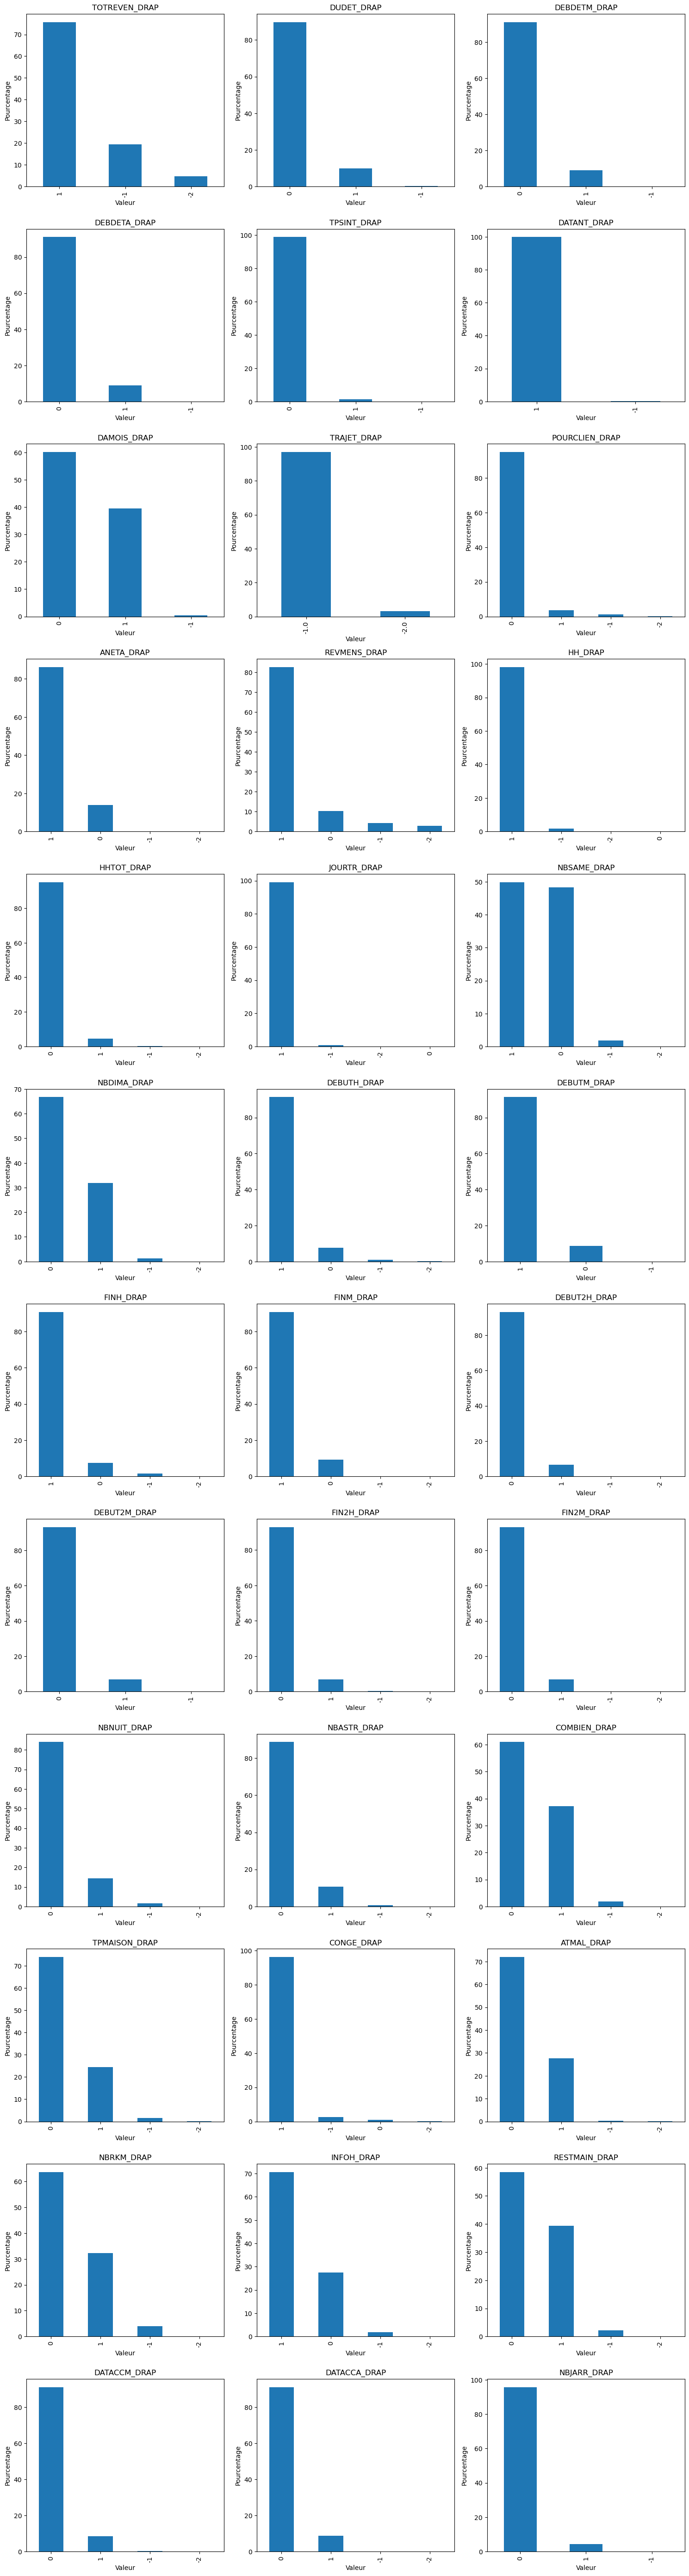

In [734]:
# Liste des colonnes à analyser
colonnes_a_analyser = ['TOTREVEN_DRAP', 'DUDET_DRAP', 'DEBDETM_DRAP', 'DEBDETA_DRAP', 'TPSINT_DRAP', 
                       'DATANT_DRAP', 'DAMOIS_DRAP', 'TRAJET_DRAP', 'POURCLIEN_DRAP', 'ANETA_DRAP', 
                       'REVMENS_DRAP', 'HH_DRAP', 'HHTOT_DRAP', 'JOURTR_DRAP', 'NBSAME_DRAP', 'NBDIMA_DRAP', 
                       'DEBUTH_DRAP', 'DEBUTM_DRAP', 'FINH_DRAP', 'FINM_DRAP', 'DEBUT2H_DRAP', 'DEBUT2M_DRAP', 
                       'FIN2H_DRAP', 'FIN2M_DRAP', 'NBNUIT_DRAP', 'NBASTR_DRAP', 'COMBIEN_DRAP', 'TPMAISON_DRAP', 
                       'CONGE_DRAP', 'ATMAL_DRAP', 'NBRKM_DRAP', 'INFOH_DRAP', 'RESTMAIN_DRAP', 'DATACCM_DRAP', 
                       'DATACCA_DRAP', 'NBJARR_DRAP']

# Préparer la figure
fig, axes = plt.subplots(nrows=len(colonnes_a_analyser)//3 + 1, ncols=3, figsize=(15, len(colonnes_a_analyser)//3 * 5))
axes = axes.flatten()

# Pour chaque colonne, créer un graphique en barres
for i, col in enumerate(colonnes_a_analyser):
    # Calculer la répartition des valeurs
    value_counts = df_sans_colonnes_vides[col].value_counts(normalize=True) * 100
    
    # Créer le graphique en barres
    ax = axes[i]
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Pourcentage')
    ax.set_xlabel('Valeur')

# Supprimer les axes inutilisés
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster l'espacement des sous-graphiques
plt.tight_layout()
plt.show()

On voit ici qu'il n'y a pas beaucoup de -2 dans les colonnes DRAP donc on peut supprimer ces lignes, cela ne risque pas de biaisé nos données.

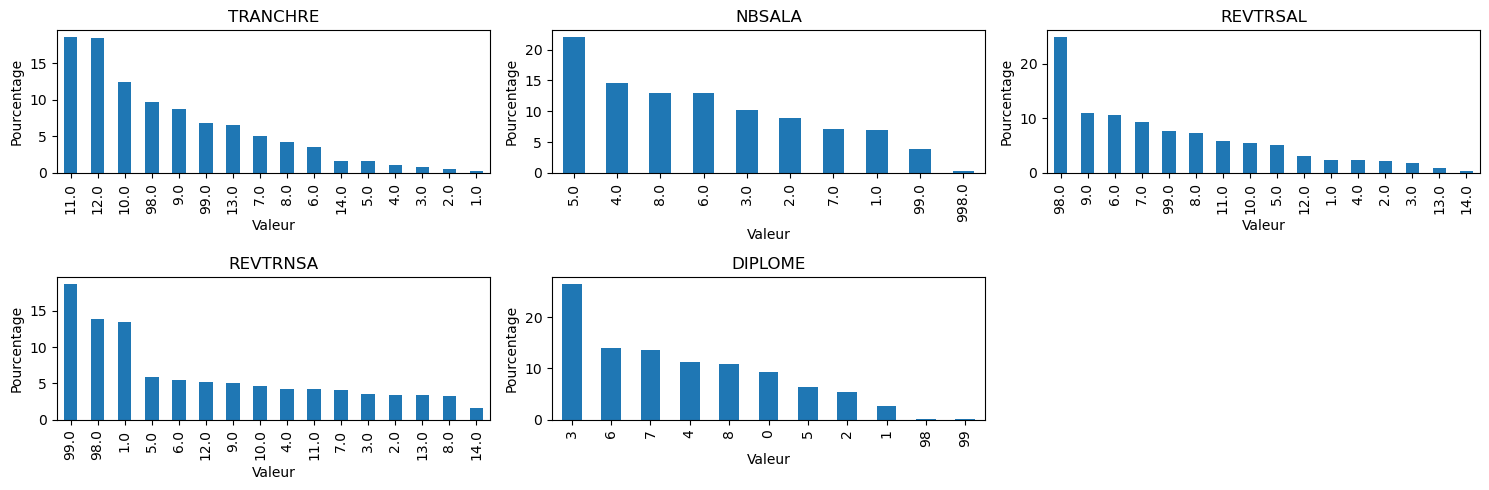

In [735]:
# Liste des colonnes à analyser
colonnes_a_analyser = ['TRANCHRE', 'NBSALA', 'REVTRSAL', 'REVTRNSA', 'DIPLOME']

# Préparer la figure
fig, axes = plt.subplots(nrows=len(colonnes_a_analyser)//3 + 1, ncols=3, figsize=(15, len(colonnes_a_analyser)//3 * 5))
axes = axes.flatten()

# Pour chaque colonne, créer un graphique en barres
for i, col in enumerate(colonnes_a_analyser):
    # Calculer la répartition des valeurs
    value_counts = df_sans_colonnes_vides[col].value_counts(normalize=True) * 100
    
    # Créer le graphique en barres
    ax = axes[i]
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Pourcentage')
    ax.set_xlabel('Valeur')

# Supprimer les axes inutilisés
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster l'espacement des sous-graphiques
plt.tight_layout()
plt.show()

On voit qu'il y a beaucoup de personnes qui ont refusé de répondre mais pour nous si les personnes ne veulent pas donner leur salaire elle risque de biaiser nos résultats, donc nous choisissons de les supprimer : REVTRSAL et REVTRNSA

Nous avons pu remarquer qu'il y a d'autres "refus" coder en 8 mais nous ne choissons pas de les supprimer car nous allons supprimer certaines colonnes nous verrons après si c'est utile

In [736]:
# Créer un masque pour les lignes à conserver (celles qui ne contiennent ni -2 ni 98 dans n'importe quelle colonne)
mask = ~df_sans_colonnes_vides.isin([-2, 98]).any(axis=1)

# Appliquer ce masque à tout le DataFrame pour conserver seulement les lignes désirées
df_filtre = df_sans_colonnes_vides[mask]

# Afficher les 20 premières lignes du DataFrame filtré
print(df_filtre.head(20))

    C1C  C1D     IDENT_MEN       IDENT_IND  NPERS  NACTIFS  TYPMEN5  TYPMEN15  \
0   2.0  2.0  100019101000  10001910100002    2.0      1.0        2        22   
2   2.0  2.0  100084601000  10008460100002    5.0      2.0        4        42   
3   2.0  2.0  100091701000  10009170100001    2.0      1.0        3        31   
4   1.0  1.0  100091801000  10009180100001    1.0      1.0        1        10   
6   2.0  2.0  100098501000  10009850100001    2.0      2.0        3        32   
7   NaN  NaN  100098601000  10009860100001    4.0      1.0        4        41   
8   2.0  2.0  100098701000  10009870100001    1.0      1.0        1        10   
9   5.0  4.0  100099801000  10009980100001    5.0      2.0        4        42   
11  3.0  2.0  100100601000  10010060100002    3.0      3.0        4        42   
13  3.0  2.0  100100801000  10010080100001    4.0      1.0        2        21   
14  1.0  2.0  100100801000  10010080100002    4.0      1.0        2        21   
15  2.0  2.0  100128601000  

In [737]:
df_filtre.shape

(30518, 532)

Puisque notre étude est porté sur les personnes en couple vivant sous le même toit nous allons réaliser notre étude sur la base de donnée filtrée directement.

In [738]:
# filtrer les données des personnes en COUPLE vivant sous le même toit
df1 = df_filtre[df_filtre['COUPLE'] == 1]

In [739]:
df1.shape

(21693, 532)

Le jeu de données est beaucoup moins grand, nous avons désormais 21693 colonnes et 532 colonnes.

Notre sujet porte sur la question : est-ce que la femme est principal apporteur de ménage, ainsi pour pouvoir étudier ce cas, nous décidons de créer une variable dépendante sur la variable PRACT et SEXE. La question PRACT en modalité 1 affirme que la personne est principalement apporteur de ressources et la question SEXE indique en modalité 2 être une femme.

Nous allons alors créer la variable dépendante : si 1 alors c'est une femme et elle est apporteur de ressources sinon 0 elle n'est pas une femme apporteur de ressources

In [740]:
# Initialiser la variable dépendante avec 0
df1['dependent_variable'] = 0

# Utiliser .loc pour définir les valeurs selon les conditions spécifiées
df1.loc[(df1['PRACT'] == 1) & (df1['SEXE'] == 2), 'dependent_variable'] = 1

# Afficher les premières lignes du DataFrame
print("Premières lignes du DataFrame avec la nouvelle colonne :")
print(df1.head())

# Compter les occurrences de chaque valeur unique dans dependent_variable
print("\nOccurrences des valeurs de 'dependent_variable' :")
print(df1['dependent_variable'].value_counts())

# Afficher les valeurs uniques de dependent_variable
print("\nValeurs uniques de 'dependent_variable' :")
print(df1['dependent_variable'].unique())

# Obtenir un résumé statistique de dependent_variable
print("\nRésumé statistique de 'dependent_variable' :")
print(df1['dependent_variable'].describe())

Premières lignes du DataFrame avec la nouvelle colonne :
   C1C  C1D     IDENT_MEN       IDENT_IND  NPERS  NACTIFS  TYPMEN5  TYPMEN15  \
2  2.0  2.0  100084601000  10008460100002    5.0      2.0        4        42   
3  2.0  2.0  100091701000  10009170100001    2.0      1.0        3        31   
6  2.0  2.0  100098501000  10009850100001    2.0      2.0        3        32   
7  NaN  NaN  100098601000  10009860100001    4.0      1.0        4        41   
9  5.0  4.0  100099801000  10009980100001    5.0      2.0        4        42   

   IR  REVMEN  ...  LNAISPER  LNAISMER  NATNAISPER  NATNAISMER  NATI  \
2   1  2300.0  ...        11        11         NaN         NaN   NaN   
3   4     NaN  ...        11        11         NaN         NaN   NaN   
6   1  2200.0  ...        11        11         NaN         NaN   NaN   
7   1   673.0  ...        11        11         NaN         NaN   NaN   
9   1  1500.0  ...        11        11         NaN         NaN   NaN   

   REVANNU_DRAP  REVANNU     

/var/folders/m8/frt_fxzd5g7gvfrk21nk2gpw0000gn/T/ipykernel_89145/625469394.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1['dependent_variable'] = 0
/var/folders/m8/frt_fxzd5g7gvfrk21nk2gpw0000gn/T/ipykernel_89145/625469394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dependent_variable'] = 0


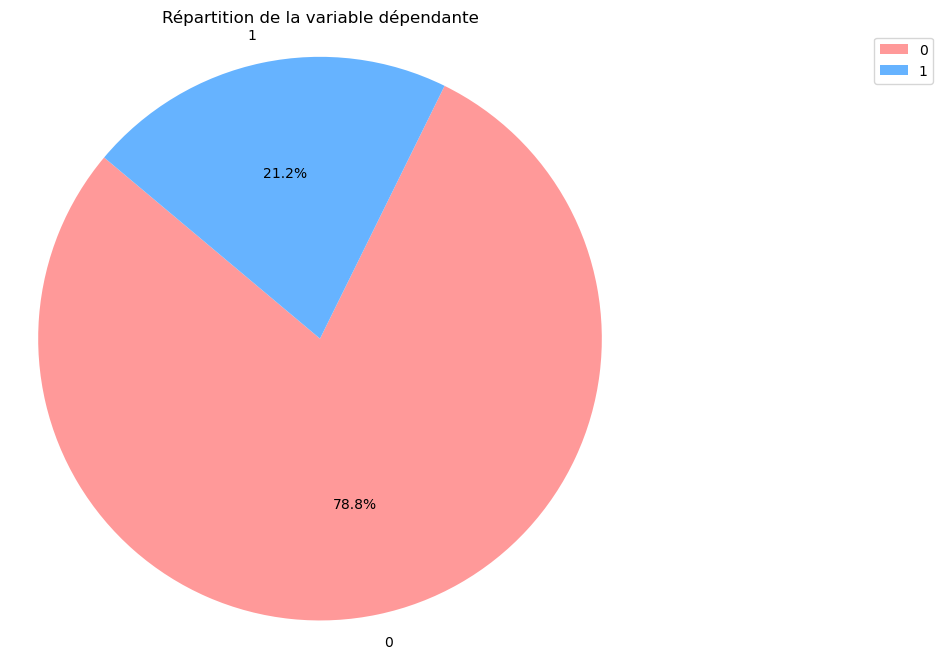

In [741]:
# Comptage des occurrences dans la colonne 'SECTEUR'
secteur_counts = df1['dependent_variable'].value_counts()

# Définir des couleurs pastel
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Créer le graphique camembert
plt.figure(figsize=(8, 8))
plt.pie(secteur_counts, labels=secteur_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.legend(secteur_counts.index, loc="best", bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.axis('equal')  # Assure que le graphique est dessiné comme un cercle
plt.title('Répartition de la variable dépendante')

# Afficher le graphique
plt.show()

La variable dépendante représente seulement 20% de notre jeu de données. Cela pourra nous poser problème pour la regression logistique sur les facteurs suivants:

1. Biais de modélisation: Les modèles de régression logistique peuvent être biaisés vers la classe majoritaire, c'est-à-dire qu'ils peuvent avoir tendance à prédire plus fréquemment la classe majoritaire (ici, ce sera la classe où la variable dépendante est égale à 0).
Cela peut conduire à des prédictions moins précises pour la classe minoritaire soit la modalité 1.

2. Interprétation des Coefficients :Les coefficients estimés par la régression logistique peuvent être influencés par le déséquilibre des classes. Par exemple, ils peuvent refléter plus fortement les caractéristiques et les prédictions de la classe majoritaire.
Il est essentiel d'interpréter les résultats avec prudence et de considérer l'impact potentiel du déséquilibre sur les conclusions tirées du modèle.

3. Performance du Modèle :

La performance du modèle, mesurée par des métriques comme l'exactitude, la précision, le rappel (recall), et le F-score, peut être biaisée par le déséquilibre des classes.
Par exemple, un modèle pourrait sembler avoir une très bonne exactitude s'il prédit systématiquement la classe majoritaire, mais il peut être inefficace dans la détection des cas de la classe minoritaire.
Malgré ce problème, nous ne décidons pas de augmenter le nombre d'observations de la classe minoritaire car nous souhaitons rester sur les données préalablement administrées.

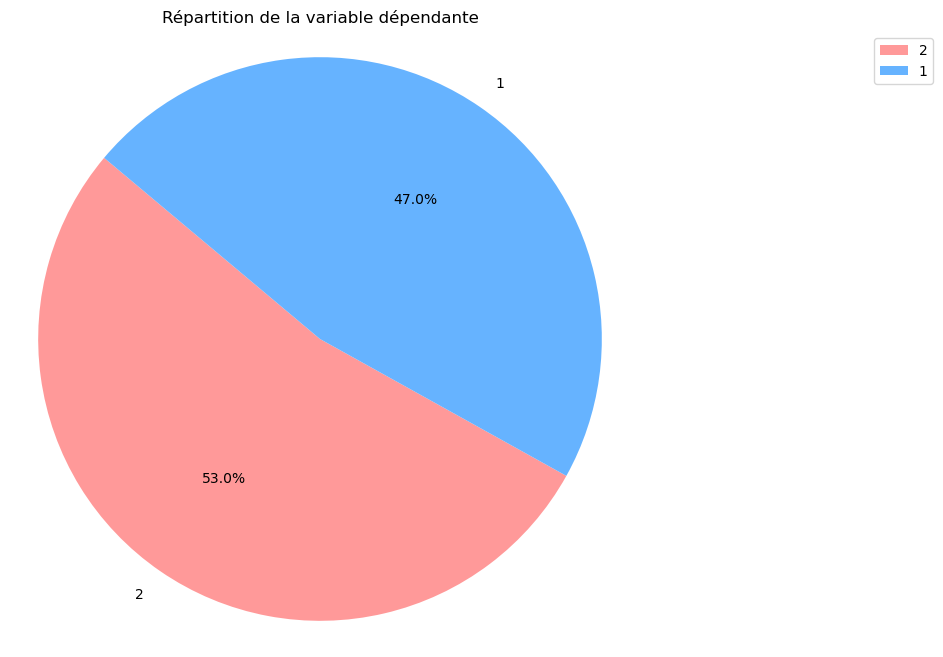

In [742]:
# Comptage des occurrences dans la colonne 'SECTEUR'
secteur_counts = df1['SEXE'].value_counts()

# Définir des couleurs pastel
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Créer le graphique camembert
plt.figure(figsize=(8, 8))
plt.pie(secteur_counts, labels=secteur_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.legend(secteur_counts.index, loc="best", bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.axis('equal')  # Assure que le graphique est dessiné comme un cercle
plt.title('Répartition de la variable dépendante')

# Afficher le graphique
plt.show()

Voici la liste des valeurs manquantes. Nous traitons les valeurs manquantes avec rigueur car elles seront cruciales pour la regression logistique et les corrélations

In [743]:
valeurs_manquantes = df1.isnull().sum()
colonnes_manquantes = valeurs_manquantes[valeurs_manquantes > 0]
if colonnes_manquantes.empty:
    print("Aucune colonne ne contient de valeurs manquantes.")
else:
    print("Colonnes avec des valeurs manquantes :")
    print(colonnes_manquantes)

Colonnes avec des valeurs manquantes :
C1C                  1088
C1D                  1088
REVMEN                343
REVMENMN              343
REVMENMX              343
REVMENUC              343
REVMENMNUC            343
REVMENMXUC            343
CJSITUA                 3
CJACTOCCUP              3
DEPNAIS              3952
ANARRIV             19606
AGARRIV             19606
PACS                15242
LIEN_03              6377
LIEN_04             11581
LIEN_05             18536
LIEN_06             20960
LIEN_07             21458
LIEN_08             21609
LIEN_09             21651
LIEN_10             21677
LIEN_11             21684
LIEN_12             21687
LIEN_13             21688
LIEN_14             21688
LIEN_15             21690
LIEN_16             21691
LIEN_17             21691
LIEN_18             21693
LIENPREF                3
SITUA                   3
TRAREF                  3
PASTRA              21557
RABS                19346
RABSP               20863
RABSPU              20863

In [744]:
df1.shape

(21693, 533)

Selon nos connaissances sur le nettoyage de données, nous avons décidé de garder les variables qui ont au moins 30% de réponses remplies car au vue de l'utilisation de la regression logistique, une grande proportion de valeurs manquantes dans les données d'entraînement peut sérieusement affecter la performance du modèle​. De plus, étant donné notre faible représentation de la modalité 1, il est important de ne pas biaiser les résulats.

In [745]:
resultat = 21693 * 0.30
print(resultat)

6507.9


In [746]:
# Définir le seuil de valeurs manquantes
seuil_valeurs_manquantes = 6508

# Calculer le nombre de valeurs manquantes pour chaque colonne
valeurs_manquantes = df1.isna().sum()

# Sélectionner les colonnes à supprimer (celles qui ont plus de `seuil_valeurs_manquantes` valeurs manquantes)
colonnes_a_supprimer = valeurs_manquantes[valeurs_manquantes > seuil_valeurs_manquantes].index

# Supprimer les colonnes
df_sans_colonnes_nan = df1.drop(columns=colonnes_a_supprimer)

# Afficher les colonnes supprimées et le nouveau DataFrame
print("Colonnes supprimées:", colonnes_a_supprimer)
print(df_sans_colonnes_nan.head())

Colonnes supprimées: Index(['ANARRIV', 'AGARRIV', 'PACS', 'LIEN_04', 'LIEN_05', 'LIEN_06',
       'LIEN_07', 'LIEN_08', 'LIEN_09', 'LIEN_10',
       ...
       'NAF17', 'NAF4', 'TPS_INTERIM', 'TPS_CONTRAT', 'DEBUT_CONTRAT', 'NAF38',
       'NATNAISPER', 'NATNAISMER', 'NATI', 'REVANNU'],
      dtype='object', length=155)
   C1C  C1D     IDENT_MEN       IDENT_IND  NPERS  NACTIFS  TYPMEN5  TYPMEN15  \
2  2.0  2.0  100084601000  10008460100002    5.0      2.0        4        42   
3  2.0  2.0  100091701000  10009170100001    2.0      1.0        3        31   
6  2.0  2.0  100098501000  10009850100001    2.0      2.0        3        32   
7  NaN  NaN  100098601000  10009860100001    4.0      1.0        4        41   
9  5.0  4.0  100099801000  10009980100001    5.0      2.0        4        42   

   IR  REVMEN  ...  REGION  ANCIENNETE  CONGETR  LNAISD  LNAISPER  LNAISMER  \
2   1  2300.0  ...     1.0       240.0        2      11        11        11   
3   4     NaN  ...     1.0       168.0 

In [747]:
df_sans_colonnes_nan.head(4)

,C1C,C1D,IDENT_MEN,IDENT_IND,NPERS,NACTIFS,TYPMEN5,TYPMEN15,IR,REVMEN,...,REGION,ANCIENNETE,CONGETR,LNAISD,LNAISPER,LNAISMER,REVANNU_DRAP,REVMENSC,REVMENSCC_DRAP,dependent_variable
2,2.0,2.0,100084601000,10008460100002,5.0,2.0,4,42,1,2300.0,...,1.0,240.0,2,11,11,11,1.0,0.000000,1.0,0
3,2.0,2.0,100091701000,10009170100001,2.0,1.0,3,31,4,NaN,...,1.0,168.0,2,11,11,11,1.0,308.333333,1.0,0
6,2.0,2.0,100098501000,10009850100001,2.0,2.0,3,32,1,2200.0,...,1.0,480.0,2,11,11,11,1.0,1250.000000,1.0,0
7,NaN,NaN,100098601000,10009860100001,4.0,1.0,4,41,1,673.0,...,1.0,168.0,2,11,11,11,1.0,0.000000,1.0,0


In [748]:
df_sans_colonnes_nan.shape

(21693, 378)

In [749]:
# Afficher les colonnes avec des NaN
cols_with_nan = df_sans_colonnes_nan.columns[df_sans_colonnes_nan.isna().any()].tolist()
print("Colonnes contenant des NaN :")

print(cols_with_nan)

Colonnes contenant des NaN :
['C1C', 'C1D', 'REVMEN', 'REVMENMN', 'REVMENMX', 'REVMENUC', 'REVMENMNUC', 'REVMENMXUC', 'CJSITUA', 'CJACTOCCUP', 'DEPNAIS', 'LIEN_03', 'LIENPREF', 'SITUA', 'TRAREF', 'MER1E', 'PER1E', 'TOTREVEN', 'ITOTREV', 'DATANT', 'LIEUW', 'TRAJET', 'ANETA', 'FRANCE', 'DRH', 'DIFPAYE', 'NBSALA', 'PAYECOM', 'TPP', 'HH', 'JOURTR', 'DEBUTM', 'FINM', 'HSUPCOMP', 'JOINDRE', 'CONGE', 'CONGEU', 'LIBCONG', 'ARETMAL', 'PRISCONG', 'EPI', 'RISK', 'FORMSEC', 'DOCEVAL', 'MEDECIN', 'VISITUNI', 'SECURITE', 'RWNORMJ', 'RWSURV', 'PUBLIC1', 'PUBLIC2', 'POLY', 'COMMENT', 'STARK', 'AIDCHEF', 'AIDAUTR', 'AIDEXT', 'COLLECT', 'REUNION', 'ACCHEF', 'TENSION1', 'TENSION2', 'EVA', 'SYNDIC', 'DISCURP', 'CHSCT', 'RESDOM', 'INFOH', 'INFOHU1', 'INFOHU2', 'FORTMOD1', 'FORTMOD2', 'FORTMOD3', 'FORTMOD4', 'FORTMOD5', 'FORTMOD6', 'FORTMOD7', 'STATUTP', 'STATUTM', 'FINETUD', 'FINETUDU', 'TCHOL', 'TCHOC', 'TSAN', 'TINA', 'TINDEP', 'TINTERIM', 'TCDD', 'NBEMP', 'DEMPRO', 'DEMENA', 'LANG1', 'REPQAA', 'INTRO', 

A partir de mes connaissances et du dictionnaire de données, je vais supprimer certaines colonnes contenent des NA qui ne me paraissent pas utile.

/Users/maudaumiphin/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


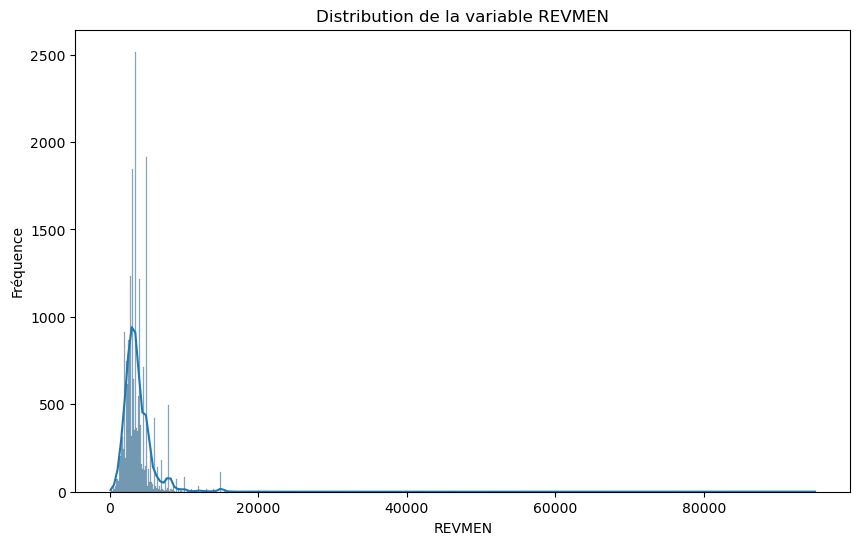

/Users/maudaumiphin/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


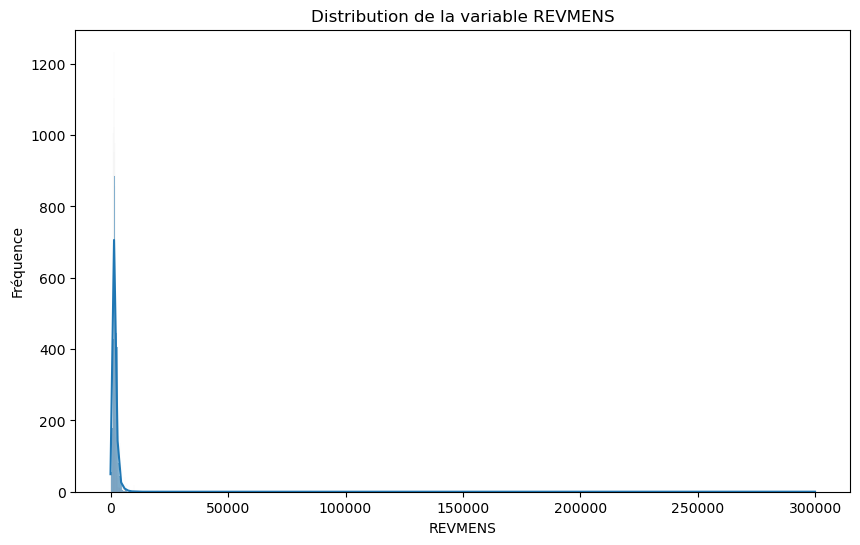

/Users/maudaumiphin/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


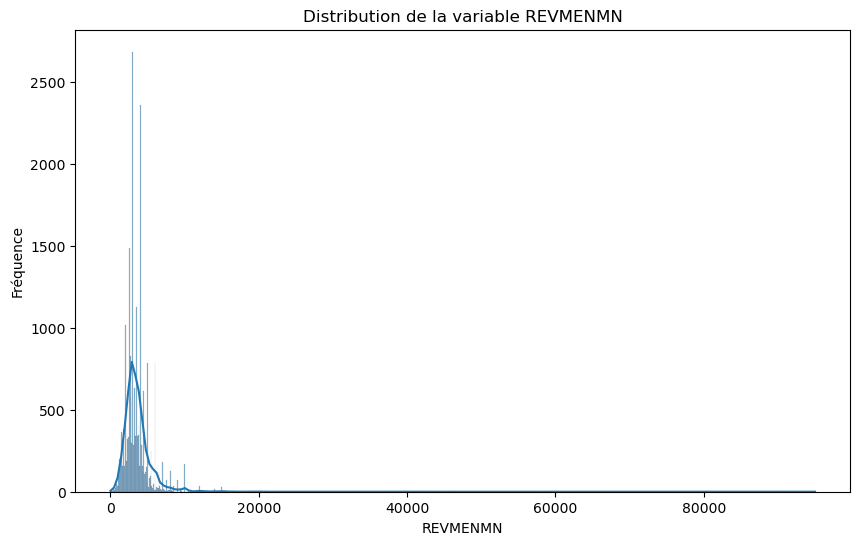

/Users/maudaumiphin/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


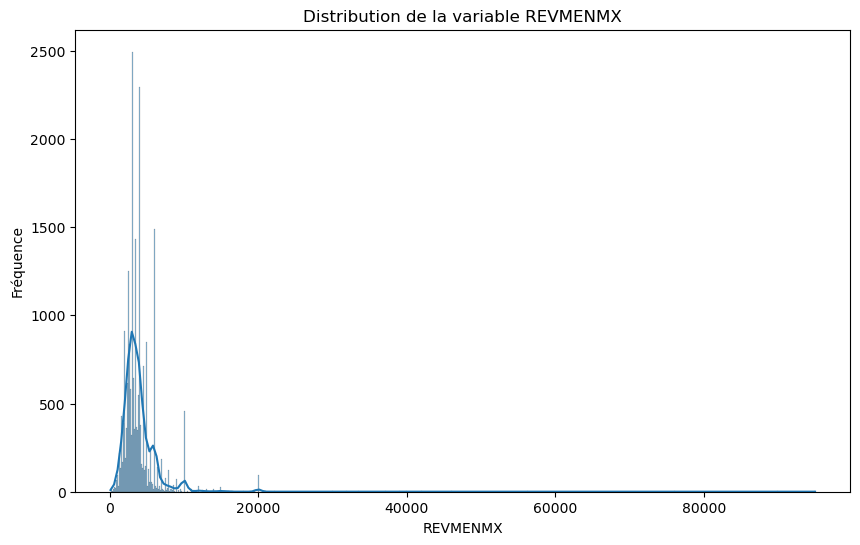

In [750]:
# Liste des variables à visualiser
variables = [
    'REVMEN', 'REVMENS', 'REVMENMN', 'REVMENMX'
]

# Affichage des répartitions
for variable in variables:
    plt.figure(figsize=(10, 6))
    if df1[variable].dtype == 'object' or df1[variable].dtype == 'category':
        sns.countplot(y=df1[variable])
        plt.title(f'Distribution de la variable {variable}')
    else:
        sns.histplot(df1[variable], kde=True)
        plt.title(f'Distribution de la variable {variable}')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.show()

Au regard des données, la variable REVMEN est la plus adéquate a utilisé car elle a une distribution qui est la plus semblable à la loi normale.

Les variables qui me semblent utiles sont : 
AGE","ANCIENNETE", "REVMEN", "LNAISD", "SITUA","ETAMATRI", "STATUT", "CJSITUA", "CJACTOCCUP", "NBENFM3", "NBENF3A17", "NBENF18P", "CLASSIF", "TYPEMPLOI", "TPP", "HH", "HSUP", "BSANTE", "AGFINETU","DIPLOME", "WHO", "REGION"

Pourquoi ces variables ?
- Âge (AGE) : L'âge peut influencer la position économique d'une personne.
- ANCIENNETE (ANCIENNETE) : L'ancienneté peut influencer les revenus économiques d'un personne, puisque cela signifie que plus elle est restée longtemps en poste plus elle a pu épargner de l'argent sur plusieurs années.
- Présence d’enfants (NBENFM3, NBENF3A17, NBENF18P) : La présence et le nombre d'enfants peuvent influencer la participation au marché du travail et la répartition des ressources.
- Niveau d'éducation (DIPLOME, AGFINETU) : L'éducation est souvent liée aux opportunités d'emploi et aux niveaux de revenu.
- Revenu (REVMEN) : Le revenu total et le revenu moyen du ménage sont des indicateurs directs de la contribution financière.
- Statut professionnel (SITUA) : Le statut d'emploi est crucial pour comprendre la source principale de revenus. Egalement, la situation du conjoint peut avoir un impact sur le revenu
- Durée du travail (DUREE_TRAV) : Le nombre d'heures travaillées peut indiquer l'engagement économique.
- Type de contrat (CONTRAT/TPP) : La nature du contrat de travail peut influencer la stabilité et le niveau des revenus.
- Secteur d'activité (STATUT / FONCTION /TYPEMLOI) : Le secteur d'activité et la fonction peut affecter les opportunités et la rémunération.
- Région (REGION) : La région de résidence peut influencer les opportunités économiques et le coût de la vie.
- La SANTE (BSANTE/WHO) : La santé peut avoir un impact sur le gain de ressources, puisque si nous sommes malades, nous ne percevons pas les mêmes revenus.
- Le lieu de naissance (LNAISD) : peut avoir un impact sur la situation de la personne puisque elle peut être issue d'une famille qui n'a pas beaucoup de revenu et rencontrée des difficultés à obtenir des ressources correctes
- HH et HSUP : les heures supplémentaires peuvent être un gain de ressources supplémentaires en plus de notre revenu et permettre à la femme peut être d'avoir plus de revenu

In [751]:
# Remplacez "df_original" par le nom de votre DataFrame existant

colonnes_a_garder = ["AGE","ANCIENNETE", "REVMEN", "LNAISD", "SITUA",
                   "ETAMATRI", "STATUT", "CJSITUA", "CJACTOCCUP", "NBENFM3", "NBENF3A17",
                   "NBENF18P", "CLASSIF", "TYPEMPLOI", "TPP", "HH", "HSUP", "BSANTE", "AGFINETU",
                   "DIPLOME", "WHO", "REGION","dependent_variable"]

# Créer un nouveau DataFrame avec seulement les colonnes sélectionnées
nouveau_df = df_sans_colonnes_nan[colonnes_a_garder].copy()

In [752]:
nouveau_df.head(1)

,AGE,ANCIENNETE,REVMEN,LNAISD,SITUA,ETAMATRI,STATUT,CJSITUA,CJACTOCCUP,NBENFM3,...,TYPEMPLOI,TPP,HH,HSUP,BSANTE,AGFINETU,DIPLOME,WHO,REGION,dependent_variable
2,49.0,240.0,2300.0,11,4.0,2,8,1.0,1.0,0.0,...,NaN,1.0,66.0,2,4,21.0,3,19.0,1.0,0


Le df contient plus que 23 colonnes qui pourraient avoir un impact sur notre variable explicative.

## 3. Nettoyage des données 

Il faut remplacer les données numériques des différentes colonnes pour réaliser une corrélation juste.

In [753]:
# Liste des colonnes à traiter
cols_to_process = ['REVMEN', 'HH', 'AGE', 'ANCIENNETE', 'AGFINETU', 'WHO', 'TPP']
# Remplacer les valeurs NaN par la moyenne pour les colonnes spécifiées
for col in cols_to_process:
    if col in nouveau_df.columns:
        nouveau_df.loc[:, col] = nouveau_df[col].fillna(nouveau_df[col].mean())

In [754]:
nouveau_df.head(1)

,AGE,ANCIENNETE,REVMEN,LNAISD,SITUA,ETAMATRI,STATUT,CJSITUA,CJACTOCCUP,NBENFM3,...,TYPEMPLOI,TPP,HH,HSUP,BSANTE,AGFINETU,DIPLOME,WHO,REGION,dependent_variable
2,49.0,240.0,2300.0,11,4.0,2,8,1.0,1.0,0.0,...,NaN,1.0,66.0,2,4,21.0,3,19.0,1.0,0


In [755]:
valeurs_manquantes = nouveau_df.isnull().sum()
colonnes_manquantes = valeurs_manquantes[valeurs_manquantes > 0]
if colonnes_manquantes.empty:
    print("Aucune colonne ne contient de valeurs manquantes.")
else:
    print("Colonnes avec des valeurs manquantes :")
    print(colonnes_manquantes)

Colonnes avec des valeurs manquantes :
SITUA            3
CJSITUA          3
CJACTOCCUP       3
CLASSIF       1700
TYPEMPLOI     1701
REGION          48
dtype: int64


Voici les nouvelles colonnes de mon dataframe.

In [756]:
# Liste des colonnes à traiter
colonnes_a_traiter = [
    'CJACTOCCUP', 'CLASSIF', 'CJSITUA', 'CLASSIF', 'TYPEMPLOI', 'REGION', 'SITUA'
]

# Remplacement des valeurs manquantes par les valeurs les plus fréquentes
for col in colonnes_a_traiter:
    valeur_la_plus_frequente = nouveau_df[col].mode()[0]  # Mode (valeur la plus fréquente) de la colonne
    nouveau_df[col].fillna(valeur_la_plus_frequente, inplace=True)

In [757]:
valeurs_manquantes = nouveau_df.isnull().sum()
colonnes_manquantes = valeurs_manquantes[valeurs_manquantes > 0]
if colonnes_manquantes.empty:
    print("Aucune colonne ne contient de valeurs manquantes.")
else:
    print("Colonnes avec des valeurs manquantes :")
    print(colonnes_manquantes)

Aucune colonne ne contient de valeurs manquantes.


In [758]:
# Liste des noms de colonnes
columns_list = nouveau_df.columns.tolist()

# Affichage des noms de colonnes
print(columns_list)

['AGE', 'ANCIENNETE', 'REVMEN', 'LNAISD', 'SITUA', 'ETAMATRI', 'STATUT', 'CJSITUA', 'CJACTOCCUP', 'NBENFM3', 'NBENF3A17', 'NBENF18P', 'CLASSIF', 'TYPEMPLOI', 'TPP', 'HH', 'HSUP', 'BSANTE', 'AGFINETU', 'DIPLOME', 'WHO', 'REGION', 'dependent_variable']


Etude de la réparition des données sur certaines variables qui sont distribuées à partir de chiffre inscrit en nombre entier. Nous n'étudions pas les autres variables car elles sont issues de chiffre liés au questionnaire et donc ne nous apportent rien d'intéressants. On va ainsi étudier la répartition des données liées à la variable dépendante et ainsi étudier la modalité 1:

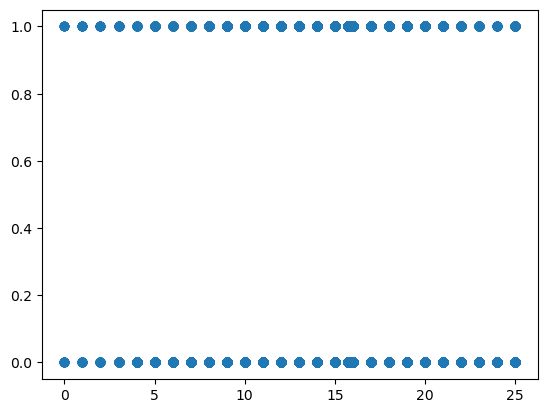

In [759]:
#Afficher le Dataset
plt.scatter(nouveau_df.WHO, nouveau_df.dependent_variable) 

Les données sont similaires pour la modalité 1 et 0

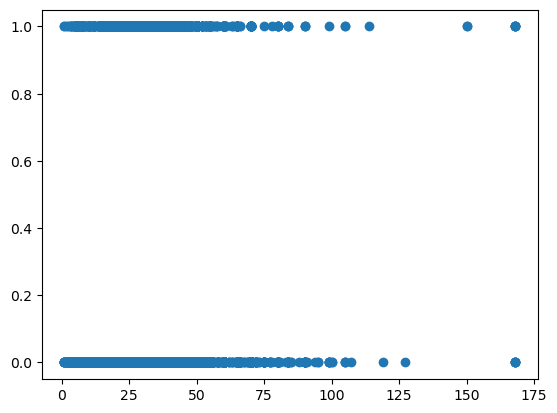

In [760]:
#Afficher le Dataset
plt.scatter(nouveau_df.HH, nouveau_df.dependent_variable) 

Les données sont plus concentrées entre 0 et 75 heures de travail pour la modalité 1.

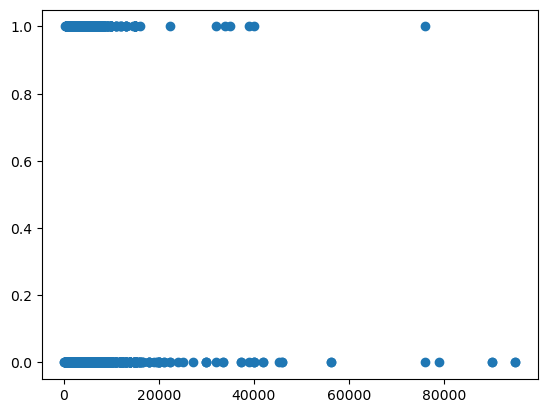

In [761]:
#Afficher le Dataset
plt.scatter(nouveau_df.REVMEN, nouveau_df.dependent_variable) 

La modalité 1 montre que le salaire mensuel est compris entre 0 et 20000 pour les femmes de ce jeu de données, ce qui paraît intéressant pour être apporteur de ressources.

In [762]:
nouveau_df['REVMEN'].value_counts()

REVMEN
3500.000000     2170
5000.000000     1852
3000.000000     1567
4000.000000     1188
2500.000000      802
2750.000000      670
2000.000000      606
4500.000000      604
3200.000000      597
2800.000000      517
8000.000000      495
6000.000000      409
2250.000000      408
2700.000000      394
2600.000000      386
3800.000000      374
3810.697705      343
3400.000000      312
2200.000000      306
3700.000000      303
3600.000000      296
3300.000000      293
2400.000000      290
2300.000000      283
1900.000000      277
4200.000000      261
2900.000000      254
5500.000000      243
3100.000000      242
1500.000000      203
1800.000000      201
7000.000000      183
1650.000000      164
2100.000000      159
3900.000000      144
4300.000000      134
4800.000000      131
1600.000000      128
1700.000000      121
6500.000000      118
15000.000000     114
4400.000000      110
1200.000000      108
4600.000000       98
4700.000000       97
1400.000000       96
4100.000000       90
10000.

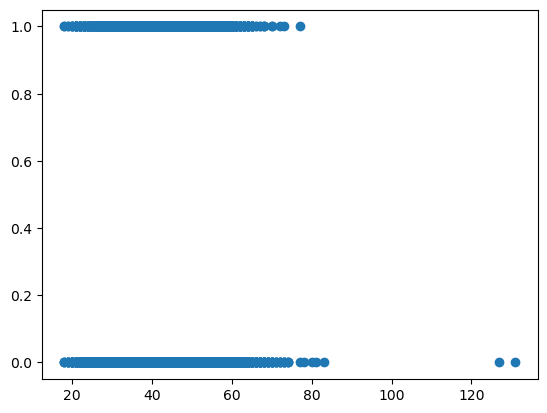

In [763]:
#Afficher le Dataset
plt.scatter(nouveau_df.AGE, nouveau_df.dependent_variable) 

Les données sont quasiment similiares entre les modalités.

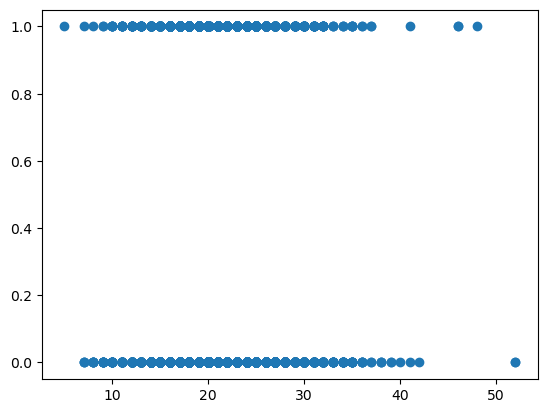

In [764]:
#Afficher le Dataset
plt.scatter(nouveau_df.AGFINETU, nouveau_df.dependent_variable) 

Les données sont quasiment imiliares entre les modalités.

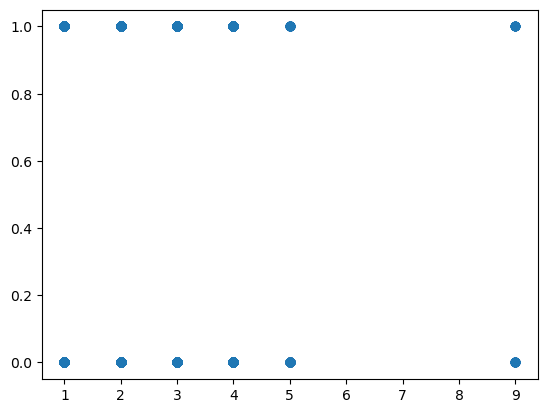

In [765]:
#Afficher le Dataset
plt.scatter(nouveau_df.BSANTE,nouveau_df.dependent_variable) 

Les données sont similiares entre les modalités.

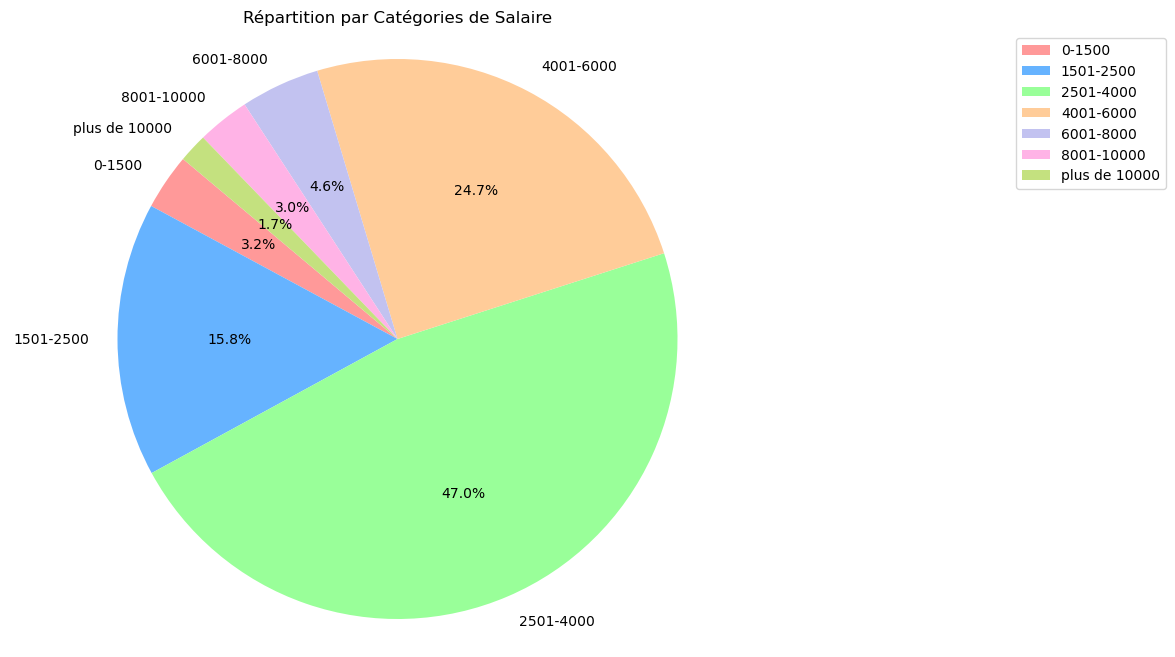

In [766]:
# Filtrer les données où la variable dépendante est égale à 1
nouveau_df1 = nouveau_df[nouveau_df['dependent_variable'] == 1]

# Définir les catégories de salaires
bins = [0, 1500, 2500, 4000, 6000, 8000, 10000, float('inf')]
labels = ['0-1500', '1501-2500', '2501-4000', '4001-6000', '6001-8000', '8001-10000', 'plus de 10000']

# Créer une nouvelle colonne pour les catégories de salaires
nouveau_df['Salaire_Catégorie'] = pd.cut(nouveau_df['REVMEN'], bins=bins, labels=labels, right=False)

# Comptage des occurrences dans la nouvelle colonne
secteur_counts = nouveau_df['Salaire_Catégorie'].value_counts().sort_index()

# Définir des couleurs pastel
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f']

# Créer le graphique camembert
plt.figure(figsize=(10, 8))
plt.pie(secteur_counts, labels=secteur_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.legend(secteur_counts.index, loc="best", bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.axis('equal')  # Assure que le graphique est dessiné comme un cercle
plt.title('Répartition par Catégories de Salaire')

# Afficher le graphique
plt.show()

On voit que dans la majorité de notre jeu de données les personnes gagnent entre 2501 et 4000€. Ensuite, entre 4001 et 6000€, ce sont des ressources

Afin de mieux voir la réparition de nos données sur les variables sélectionnées, nous avons créer des classes pour chaque variable:

In [767]:
nouveau_df['STATUT'].value_counts()

STATUT
6     10069
1      3303
2      2645
3      1903
10     1388
4      1067
7       739
5       285
9       220
8        74
Name: count, dtype: int64

In [768]:
# Définir les intervalles pour les classes d'âge
bins = [0, 18, 25, 30, 40, 50, float('inf')]  # Les âges sont inclus dans les bornes inférieures, mais pas dans les bornes supérieures
labels = ['Moins de 18 ans', '18-24 ans', '25-30 ans', '30-40 ans', '40-50 ans', 'Plus de 50 ans']

# Utiliser pd.cut pour créer les classes d'âge
nouveau_df['Classe_Age'] = pd.cut(nouveau_df['AGE'], bins=bins, labels=labels, right=False)

In [769]:
# Mapping des valeurs de 'DIPLOME' vers les nouvelles catégories
mapping = {
    0: 'Aucun diplôme',
    1: 'Aucun diplôme',
    2: 'Aucun diplôme',
    3: 'Bac',
    4: 'Bac',
    5: 'Bac',
    6: 'BAC+2 à BAC+4',
    7: 'BAC+2 à BAC+4',
    8: 'BAC+5 et plus'
}

# Fonction pour appliquer le mapping à la colonne 'DIPLOME'
def categorize_diplome(diplome):
    return mapping.get(diplome)

# Appliquer la fonction categorize_diplome à la colonne 'DIPLOME' pour créer 'Niveau éducation'
nouveau_df['Niveau_éducation'] = nouveau_df['DIPLOME'].map(categorize_diplome)

In [770]:
# Mapping des valeurs de 'CJSITUA' vers les nouvelles catégories
mapping = {
    1: 'Actif',
    2: 'Actif', 
    3: 'Non Actif',
    4: 'Non Actif',
    5: 'Non Actif',
    6: 'Non Actif',
    7: 'Non Actif',
    8: 'Non Actif',
}

# Fonction pour appliquer le mapping à la colonne 'CJSITUA' et créer une nouvelle colonne 'Situation conjoint'
def categorize_situa_conj(cjsitua):
    return mapping.get(cjsitua, 'Autre')

nouveau_df['Situation_conjoint'] = nouveau_df['CJSITUA'].apply(categorize_situa_conj)

In [771]:
# Mapping des valeurs de 'STATUT' vers les nouvelles catégories
mapping = {
    1: 'Salarié public',
    2: 'Salarié public', 
    3: 'Salarié public',
    4: 'Salarié privé',
    5: 'Salarié public',
    6: 'Salarié privé',
    7: 'Salarié privé',
    8: 'Non Actif',
    9: 'Salarié privé',
    10: 'Indépendent'
}

# Fonction pour appliquer le mapping à la colonne 'CJSITUA' et créer une nouvelle colonne 'Situation conjoint'
def statut(statut):
    return mapping.get(statut, 'Autre')

nouveau_df['Statut_type_salarié'] = nouveau_df['STATUT'].apply(statut)

<Figure size 1200x800 with 0 Axes>

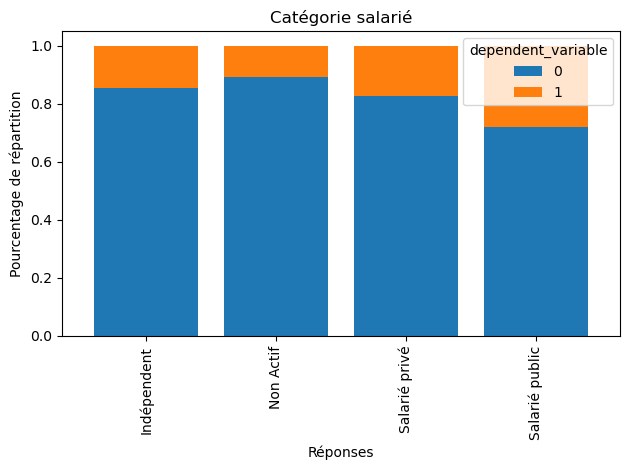

In [772]:
# Influence du revenu sur la variable dépendante
# Créer la table croisée des fréquences
table = pd.crosstab(nouveau_df.Statut_type_salarié, nouveau_df.dependent_variable)
table_pct = table.div(table.sum(1).astype(float), axis=0)

# Ajuster la taille de la figure pour une meilleure lisibilité
plt.figure(figsize=(12, 8))

# Plot avec des barres empilées
table_pct.plot(kind='bar', stacked=True, width=0.8)

# Titres et labels
plt.title('Catégorie salarié')
plt.xlabel('Réponses')
plt.ylabel('Pourcentage de répartition')

# Affichage du graphique
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

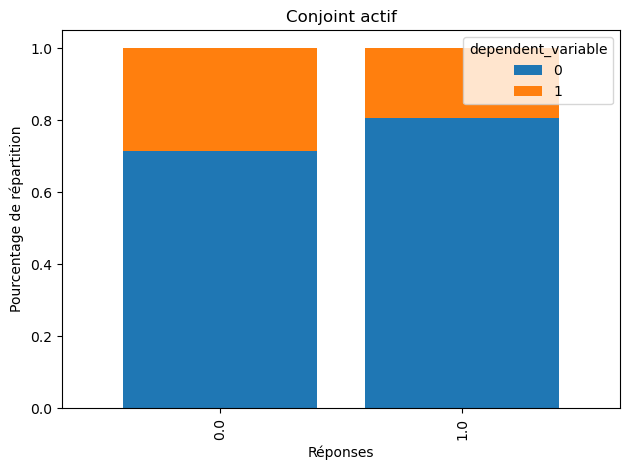

In [773]:
# Influence du revenu sur la variable dépendante
# Créer la table croisée des fréquences
table = pd.crosstab(nouveau_df.CJACTOCCUP, nouveau_df.dependent_variable)
table_pct = table.div(table.sum(1).astype(float), axis=0)

# Ajuster la taille de la figure pour une meilleure lisibilité
plt.figure(figsize=(12, 8))

# Plot avec des barres empilées
table_pct.plot(kind='bar', stacked=True, width=0.8)

# Titres et labels
plt.title('Conjoint actif')
plt.xlabel('Réponses')
plt.ylabel('Pourcentage de répartition')

# Affichage du graphique
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

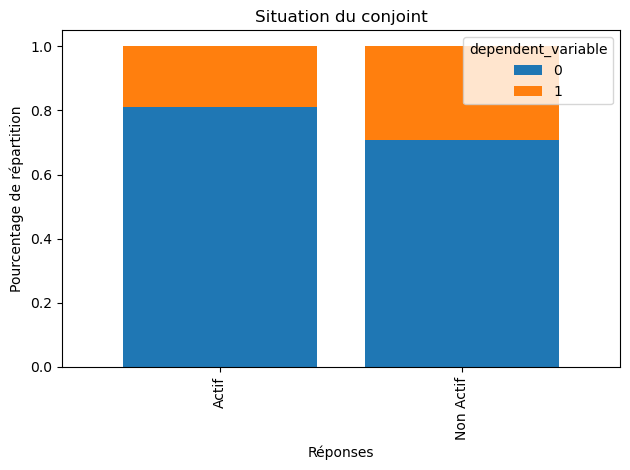

In [774]:
# Influence du revenu sur la variable dépendante
# Créer la table croisée des fréquences
table = pd.crosstab(nouveau_df.Situation_conjoint, nouveau_df.dependent_variable)
table_pct = table.div(table.sum(1).astype(float), axis=0)

# Ajuster la taille de la figure pour une meilleure lisibilité
plt.figure(figsize=(12, 8))

# Plot avec des barres empilées
table_pct.plot(kind='bar', stacked=True, width=0.8)

# Titres et labels
plt.title('Situation du conjoint')
plt.xlabel('Réponses')
plt.ylabel('Pourcentage de répartition')

# Affichage du graphique
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

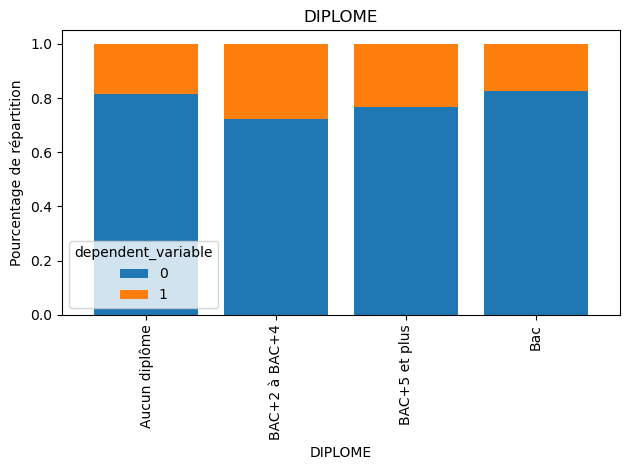

In [775]:
# Influence du revenu sur la variable dépendante
# Créer la table croisée des fréquences
table = pd.crosstab(nouveau_df.Niveau_éducation, nouveau_df.dependent_variable)
table_pct = table.div(table.sum(1).astype(float), axis=0)

# Ajuster la taille de la figure pour une meilleure lisibilité
plt.figure(figsize=(12, 8))

# Plot avec des barres empilées
table_pct.plot(kind='bar', stacked=True, width=0.8)

# Titres et labels
plt.title('DIPLOME')
plt.xlabel('DIPLOME')
plt.ylabel('Pourcentage de répartition')

# Affichage du graphique
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

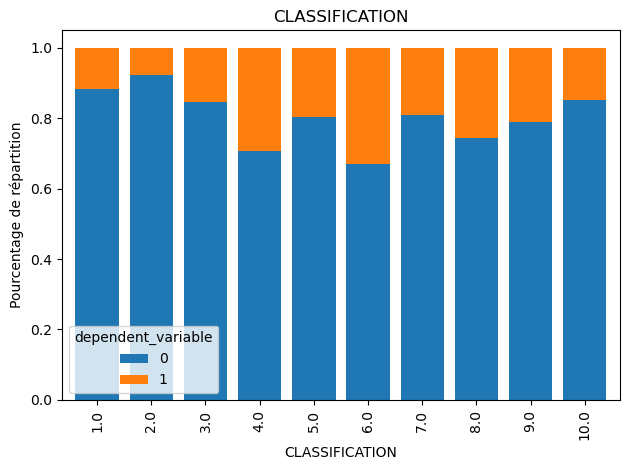

In [776]:
# Influence du revenu sur la variable dépendante
# Créer la table croisée des fréquences
table = pd.crosstab(nouveau_df.CLASSIF, nouveau_df.dependent_variable)
table_pct = table.div(table.sum(1).astype(float), axis=0)

# Ajuster la taille de la figure pour une meilleure lisibilité
plt.figure(figsize=(12, 8))

# Plot avec des barres empilées
table_pct.plot(kind='bar', stacked=True, width=0.8)

# Titres et labels
plt.title('CLASSIFICATION')
plt.xlabel('CLASSIFICATION')
plt.ylabel('Pourcentage de répartition')

# Affichage du graphique
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

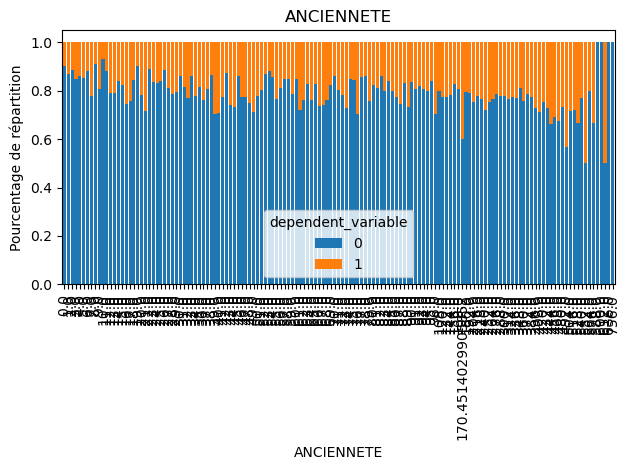

In [777]:
# Influence du revenu sur la variable dépendante
# Créer la table croisée des fréquences
table = pd.crosstab(nouveau_df.ANCIENNETE, nouveau_df.dependent_variable)
table_pct = table.div(table.sum(1).astype(float), axis=0)

# Ajuster la taille de la figure pour une meilleure lisibilité
plt.figure(figsize=(12, 8))

# Plot avec des barres empilées
table_pct.plot(kind='bar', stacked=True, width=0.8)

# Titres et labels
plt.title('ANCIENNETE')
plt.xlabel('ANCIENNETE')
plt.ylabel('Pourcentage de répartition')

# Affichage du graphique
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

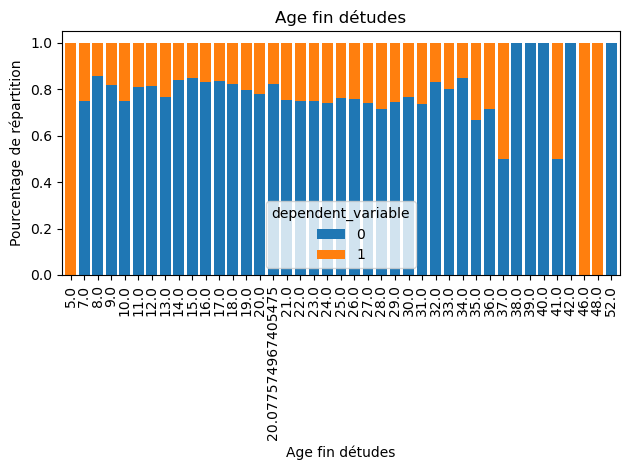

In [779]:
# Influence du revenu sur la variable dépendante
# Créer la table croisée des fréquences
table = pd.crosstab(nouveau_df.AGFINETU, nouveau_df.dependent_variable)
table_pct = table.div(table.sum(1).astype(float), axis=0)

# Ajuster la taille de la figure pour une meilleure lisibilité
plt.figure(figsize=(12, 8))

# Plot avec des barres empilées
table_pct.plot(kind='bar', stacked=True, width=0.8)

# Titres et labels
plt.title('Age fin détudes')
plt.xlabel('Age fin détudes')
plt.ylabel('Pourcentage de répartition')

# Affichage du graphique
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

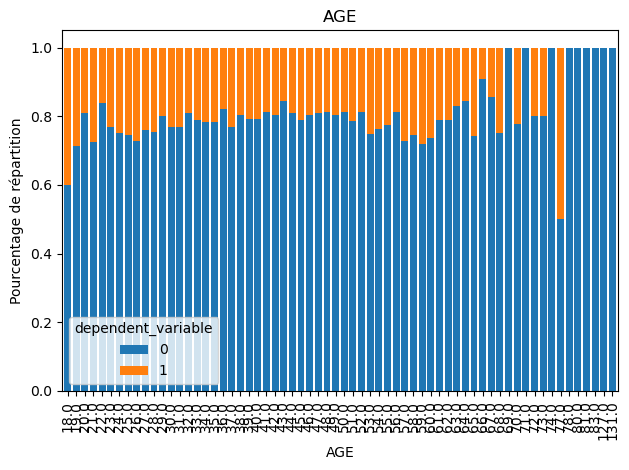

In [781]:
# Influence du revenu sur la variable dépendante
# Créer la table croisée des fréquences
table = pd.crosstab(nouveau_df.AGE, nouveau_df.dependent_variable)
table_pct = table.div(table.sum(1).astype(float), axis=0)

# Ajuster la taille de la figure pour une meilleure lisibilité
plt.figure(figsize=(12, 8))

# Plot avec des barres empilées
table_pct.plot(kind='bar', stacked=True, width=0.8)

# Titres et labels
plt.title('AGE')
plt.xlabel('AGE')
plt.ylabel('Pourcentage de répartition')

# Affichage du graphique
plt.tight_layout()
plt.show()

Au regard de ces données et de la dispersion de la variable 1 et 0, j'aimerais les étudier dans mes variables explicatives de regression logistique. La plus intéréssante semble celle liée à la situation du conjoint.

Afin d'obtenir une convergence rapide, nous décidons de normaliser les données pour obtenir des échelles similaires et ainsi permettre de mieux ajuster notre régression logistique. Ainsi, la normalisation met toutes les caractéristiques sur un pied d'égalité afin de prévenir les éventuels biais.

In [782]:
# Liste des colonnes à normaliser
columns_to_normalize = [
    'AGE', 'ANCIENNETE', 'REVMEN', 'LNAISD', 'REGION', 'SITUA', 'ETAMATRI', 'STATUT', 'CJSITUA', 'CJACTOCCUP', 'NBENFM3', 'NBENF3A17', 'NBENF18P', 'CLASSIF', 'TYPEMPLOI', 'STATUT', 'TPP', 'HH', 'REPOS', 'SAMEDI', 'DIMANCHE', 'NUIT', 'HSUP', 'MAISON', 'MISSION', 'BSANTE', 'AGFINETU', 'DIPLOME', 'WHO', 'REGION'
]

# Assurez-vous que les colonnes existent dans le DataFrame
existing_columns = [col for col in columns_to_normalize if col in nouveau_df.columns]

# Afficher un avertissement si certaines colonnes sont manquantes
missing_columns = set(columns_to_normalize) - set(existing_columns)
if missing_columns:
    print(f"Les colonnes suivantes sont manquantes dans le DataFrame : {missing_columns}")

# Initialiser le StandardScaler
scaler = StandardScaler()

# Normaliser les colonnes existantes
nouveau_df[existing_columns] = scaler.fit_transform(nouveau_df[existing_columns])

print("Colonnes normalisées :")
print(nouveau_df[existing_columns].head())

Les colonnes suivantes sont manquantes dans le DataFrame : {'DIMANCHE', 'MAISON', 'MISSION', 'REPOS', 'NUIT', 'SAMEDI'}
Colonnes normalisées :
        AGE  ANCIENNETE        REVMEN    LNAISD    REGION     SITUA  ETAMATRI  \
2  0.551410    0.527177 -5.585622e-01 -0.287429 -1.446396  5.688781  0.350647   
3 -0.142737   -0.018582  1.681373e-16 -0.287429 -1.446396 -0.117684  0.350647   
6  2.038866    2.346371 -5.955360e-01 -0.287429 -1.446396 -0.117684  0.350647   
7  0.650573   -0.018582 -1.160126e+00 -0.287429 -1.446396 -0.117684 -1.358312   
9 -0.836883    0.345257 -8.543526e-01 -0.287429 -1.446396 -0.117684  0.350647   

     STATUT   CJSITUA  CJACTOCCUP  ...  TYPEMPLOI    STATUT       TPP  \
2  1.319774 -0.494787    0.506431  ...   0.209956  1.319774 -0.451829   
3  2.120497  2.352423   -1.974602  ...   0.209956  2.120497 -0.451829   
6  2.120497 -0.494787    0.506431  ...   0.209956  2.120497 -0.451829   
7  2.120497  2.352423   -1.974602  ...   0.209956  2.120497 -0.451829   
9  0.

In [783]:
# Sélectionner uniquement les colonnes numériques pour le calcul des corrélations
colonnes_numeriques = nouveau_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculer les corrélations avec la colonne 'dependent_variable'
correlations = nouveau_df[colonnes_numeriques].corrwith(nouveau_df['dependent_variable'], method='pearson')

# Trier les corrélations par ordre décroissant
correlations = correlations.sort_values(ascending=False)

# Ajuster les options d'affichage pour voir toutes les lignes
pd.set_option('display.max_rows', None)

# Afficher les corrélations
print("Corrélations avec 'dependent_variable' :")
print(correlations)

Corrélations avec 'dependent_variable' :
dependent_variable    1.000000
CLASSIF               0.082219
CJSITUA               0.077053
DIPLOME               0.074055
AGFINETU              0.071153
ANCIENNETE            0.071090
TYPEMPLOI             0.039967
BSANTE                0.015875
AGE                   0.001593
ETAMATRI             -0.000655
REGION               -0.002938
TPP                  -0.009778
HH                   -0.015743
NBENF18P             -0.017181
NBENFM3              -0.017751
LNAISD               -0.018963
SITUA                -0.023657
HSUP                 -0.027708
REVMEN               -0.038802
WHO                  -0.050470
NBENF3A17            -0.065005
CJACTOCCUP           -0.092732
STATUT               -0.123911
dtype: float64


On voit ici que les corrélations sont très faibles. Ainsi, nous allons tout de même essayer notre regression logistique sur les variables qui nous semblent pertinentes au regarde de notre perception.
Ici les variables qui nous interessent sont : 'CJACTOCCUP', 'CLASSIF', 'CJSITUA','DIPLOME' ,'AGFINETU'et 'ANCIENNETE'. De plus, au regard de nos données que l'on a observés au dessus nous décidons d'ajouter le statut et le diplôme.

In [784]:
nouveau_df.head(4)

,AGE,ANCIENNETE,REVMEN,LNAISD,SITUA,ETAMATRI,STATUT,CJSITUA,CJACTOCCUP,NBENFM3,...,AGFINETU,DIPLOME,WHO,REGION,dependent_variable,Salaire_Catégorie,Classe_Age,Niveau_éducation,Situation_conjoint,Statut_type_salarié
2,0.551410,0.527177,-5.585622e-01,-0.287429,5.688781,0.350647,1.319774,-0.494787,0.506431,-0.415091,...,2.670121e-01,-0.468164,6.925155e-01,-1.446396,0,1501-2500,40-50 ans,Bac,Actif,Non Actif
3,-0.142737,-0.018582,1.681373e-16,-0.287429,-0.117684,0.350647,2.120497,2.352423,-1.974602,-0.415091,...,-8.908580e-01,-1.412255,1.322422e+00,-1.446396,0,2501-4000,40-50 ans,Aucun diplôme,Non Actif,Indépendent
6,2.038866,2.346371,-5.955360e-01,-0.287429,-0.117684,0.350647,2.120497,-0.494787,0.506431,-0.415091,...,1.028395e-15,-1.412255,1.322422e+00,-1.446396,0,1501-2500,Plus de 50 ans,Aucun diplôme,Actif,Indépendent
7,0.650573,-0.018582,-1.160126e+00,-0.287429,-0.117684,-1.358312,2.120497,2.352423,-1.974602,-0.415091,...,1.028395e-15,-1.412255,3.729796e-16,-1.446396,0,0-1500,Plus de 50 ans,Aucun diplôme,Non Actif,Indépendent


Je vais désormais faire une regression logistique sur les corrélations qui sont les plus hautes que ce soit négatifs ou positifs, voici les modèles qui me donnent les scores les plus hauts afin de définir si la femme est apporteur de ressource oui ou non :

Matrice de confusion:
[[5131   22]
 [1345   10]]

Exactitude: 0.7899508297480025

Rapport de classification:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5153
           1       0.31      0.01      0.01      1355

    accuracy                           0.79      6508
   macro avg       0.55      0.50      0.45      6508
weighted avg       0.69      0.79      0.70      6508


AUC: 0.6371315244299348


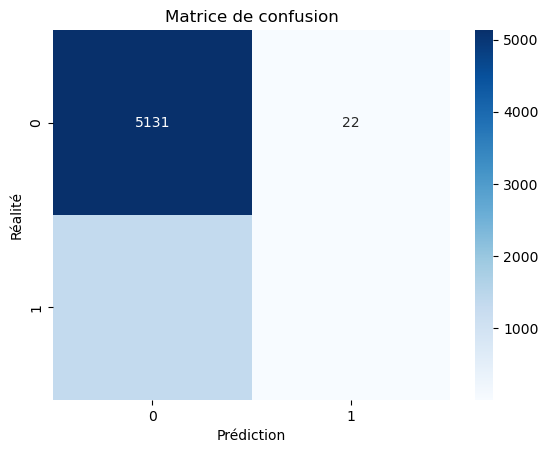

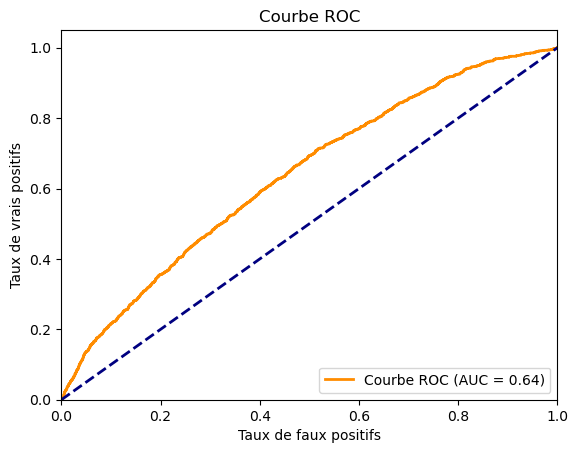

Optimization terminated successfully.
         Current function value: 0.494866
         Iterations 6

Pseudo-R2 de McFadden: 0.04521340454970124


In [785]:
# Sélection des colonnes 
columns_for_regression = ['CJACTOCCUP', 'CLASSIF', 'CJSITUA','DIPLOME','ANCIENNETE','AGFINETU', 'STATUT']

# Séparation des données en variables prédictives (X) et variable cible (y)
X = nouveau_df[columns_for_regression]
y = nouveau_df['dependent_variable']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialisation et entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(conf_matrix)

# Calcul de l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print("\nExactitude:", accuracy)

# Rapport de classification
class_report = classification_report(y_test, y_pred)
print("\nRapport de classification:")
print(class_report)

# Courbe ROC et AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nAUC:", roc_auc)

# Visualisation de la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de confusion')
plt.show()

# Visualisation de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

# Calcul du pseudo-R2 de McFadden
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()
pseudo_r2 = 1 - (result.llf / result.llnull)
print("\nPseudo-R2 de McFadden:", pseudo_r2)

Ici la Matrice de confusion a True Negatives (TN) : 5131, False Positives (FP) : 22, False Negatives (FN) : 1344, True Positives (TP) : 11)
Le modèle de prédiction est faible pour cette regression logistique.

1. La précision
La précision pour la classe 0 est de 0.79 pour la classe 0. Cela signifie que parmi toutes les prédictions positives faites par le modèle pour la classe 0, 79% étaient effectivement correctes. En d'autres termes, sur toutes les prédictions où le modèle a prédit que l'observation était de la classe 0, 79% étaient réellement de la classe 0.

La précision pour la classe 1 est de 0.45 pour la classe 1. Cela indique que parmi toutes les prédictions positives faites par le modèle pour la classe 1, 45% étaient correctes. En d'autres termes, sur toutes les prédictions où le modèle a prédit que l'observation était de la classe 1, 45% étaient effectivement de la classe 1.

2. Le recall 

Le rappel est de 0.99 pour la classe 0. Cela signifie que le modèle a réussi à capturer 99% de toutes les observations réelles de la classe 0. En d'autres termes, parmi toutes les observations réelles qui étaient de la classe 0, le modèle en a identifié correctement 99%.

Le rappel est de 0.02 pour la classe 1. Cela indique que le modèle n'a capturé que 2% de toutes les observations réelles de la classe 1. En d'autres termes, sur toutes les observations réelles qui étaient de la classe 1, le modèle n'en a identifié que 2%.

3. F1-Score
Le F1-score est une mesure combinée de la précision et du rappel, calculée comme la moyenne harmonique de ces deux valeurs. Il donne une mesure unique de la performance du modèle qui prend en compte à la fois les faux positifs et les faux négatifs.

Classe 0 (Non 1) : Le F1-score est de 0.88 pour la classe 0. Cela indique une bonne harmonie entre précision et rappel pour la classe 0, avec une valeur élevée indiquant un bon équilibre entre les prédictions correctes positives et négatives pour cette classe.

Classe 1 (Oui 1) : Le F1-score est de 0.03 pour la classe 1. Cela montre que le modèle a du mal à trouver un équilibre entre précision et rappel pour la classe 1, ce qui est souvent dû à un faible rappel (capture des vrais positifs) dans ce cas particulier.
Enfin, Concernant le ROC : l'AUC-ROC de 0,64 montre que le modèle a une capacité modérée à discriminer entre les classes positives et négatives. 

Le modèle de régression logistique n'explique qu'environ 4.5% de la variance dans les données. Cela indique que le modèle a une capacité limitée à prédire correctement la variable dépendante à partir des variables explicatives fournies. En effet, les données choisies ne permettent pas d'expliquer que la femme est apporteur de ressources, cependant c'est cohérent puisque on voit que la variable dépendante (modalité 1: être une femme + apporteur de ressources) ne représente que 21% de notre jeu de données. Cela est dû à divers facteurs tels que le déséquilibre des classes dans notre variable dépendante.

Ainsi, au regard de nos données nous allons analyser la regression logistique avec d'autres variables qui nous semblent pertinentes. Nous allons ainsi regarder sur tout le jeu de données et non au regard de notre perception et de la recherche documentaire (lecture d'articles).

In [786]:
# Liste des noms de colonnes
columns_list = df1.columns.tolist()

# Affichage des noms de colonnes
print(columns_list)

['C1C', 'C1D', 'IDENT_MEN', 'IDENT_IND', 'NPERS', 'NACTIFS', 'TYPMEN5', 'TYPMEN15', 'IR', 'REVMEN', 'REVMENMN', 'REVMENMX', 'COEFFUC', 'REVMENUC', 'REVMENMNUC', 'REVMENMXUC', 'CJSITUA', 'CJACTOCCUP', 'SEXE', 'MNAIS', 'ANAIS', 'AGE', 'AGEQ', 'LNAIS', 'DEPNAIS', 'NAIS7', 'ANARRIV', 'AGARRIV', 'COUPLE', 'COUPLRP', 'CONJOINT', 'ETAMATRI', 'PACS', 'ENFANT', 'LIEN_01', 'LIEN_02', 'LIEN_03', 'LIEN_04', 'LIEN_05', 'LIEN_06', 'LIEN_07', 'LIEN_08', 'LIEN_09', 'LIEN_10', 'LIEN_11', 'LIEN_12', 'LIEN_13', 'LIEN_14', 'LIEN_15', 'LIEN_16', 'LIEN_17', 'LIEN_18', 'TYPOLOG', 'IPROPLOC', 'AUTLOG', 'PRACT', 'IPRAN', 'LIENPREF', 'FAMPRINC', 'SITUA', 'TRAREF', 'PASTRA', 'RABS', 'RABSP', 'RABSPU', 'AIDFAM', 'INFORM', 'MER1E', 'PER1E', 'NOIK1', 'NOIK2', 'CJENQUETE', 'NBENFM3', 'NBENF3A17', 'NBENF18P', 'TOTREVEN', 'ITOTREV', 'TRANCHRE', 'EREG', 'NBSAL', 'NBSALAID', 'ENCADR', 'TITPUB', 'DUDET', 'DUDETU', 'DEBDETM', 'DEBDETA', 'TPSINT', 'TPSINTU', 'RDET', 'DATANT', 'DAMOIS', 'LIEUW', 'TRAJET', 'CLIENT', 'POURCLI

In [787]:
# Liste des colonnes à normaliser
columns_to_normalize = [
    'C1C', 'C1D', 'IDENT_MEN', 'IDENT_IND', 'NPERS', 'NACTIFS', 'TYPMEN5', 'TYPMEN15', 'IR', 'REVMEN', 'REVMENMN', 'REVMENMX', 'COEFFUC', 'REVMENUC', 'REVMENMNUC', 'REVMENMXUC', 'CJSITUA', 'CJACTOCCUP', 'SEXE', 'MNAIS', 'ANAIS', 'AGE', 'AGEQ', 'LNAIS', 'DEPNAIS', 'NAIS7', 'ANARRIV', 'AGARRIV', 'COUPLE', 'COUPLRP', 'CONJOINT', 'ETAMATRI', 'PACS', 'ENFANT', 'LIEN_01', 'LIEN_02', 'LIEN_03', 'LIEN_04', 'LIEN_05', 'LIEN_06', 'LIEN_07', 'LIEN_08', 'LIEN_09', 'LIEN_10', 'LIEN_11', 'LIEN_12', 'LIEN_13', 'LIEN_14', 'LIEN_15', 'LIEN_16', 'LIEN_17', 'LIEN_18', 'TYPOLOG', 'IPROPLOC', 'AUTLOG', 'PRACT', 'IPRAN', 'LIENPREF', 'FAMPRINC', 'SITUA', 'TRAREF', 'PASTRA', 'RABS', 'RABSP', 'RABSPU', 'AIDFAM', 'INFORM', 'MER1E', 'PER1E', 'NOIK1', 'NOIK2', 'CJENQUETE', 'NBENFM3', 'NBENF3A17', 'NBENF18P', 'TOTREVEN', 'ITOTREV', 'TRANCHRE', 'EREG', 'NBSAL', 'NBSALAID', 'ENCADR', 'TITPUB', 'DUDET', 'DUDETU', 'DEBDETM', 'DEBDETA', 'TPSINT', 'TPSINTU', 'RDET', 'DATANT', 'DAMOIS', 'LIEUW', 'TRAJET', 'CLIENT', 'POURCLIEN', 'ANETA', 'FRANCE', 'DRH', 'DIFPAYE', 'NBSALA', 'AUTRETA', 'NBSALB', 'REVTRSAL', 'REVTRNSA', 'PAYECOM', 'TPP', 'TXTPPB', 'RAISTP', 'HH', 'HHTOT', 'JOURTR', 'REPOS', 'SAMEDI', 'NBSAME', 'DIMANCHE', 'NBDIMA', 'DIMCOMP', 'DETHOR', 'HORANGT', 'PREMOIS', 'PRESEM', 'PREJOUR', 'HORVAR', 'PERIODE', 'DEBUTM', 'FINM', 'DEBUT2H', 'DEBUT2M', 'FIN2H', 'FIN2M', 'CONTROLE', 'PTMATIN', 'SOIR', 'NUIT', 'NBNUIT', 'NUICOMP', 'HSUP', 'HSUPCOMP', 'ASTREINTE', 'NBASTR', 'ASTRCOMP', 'JOINDRE', 'COMBIEN', 'MAISON', 'TPMAISON', 'MISSION', 'CONGE', 'CONGEU', 'LIBCONG', 'ARETMAL', 'ATMAL', 'PRISCONG', 'URGFAM1', 'CVFVP', 'AIDHID', 'CWDEBOU', 'CWPOSTU', 'CWDEPLA', 'CWLOURD', 'CWMVT', 'CWVIB', 'CWVUE', 'CWLETR', 'CWMINUS', 'CWVISO', 'HYGSAL', 'HYGCHUMI', 'HYGCOUR', 'HYGODEUR', 'HYGCHAUD', 'HYGFROID', 'HYGSANI', 'HYGVUE', 'HYGPRIV', 'CONDUITE', 'NBRKM', 'NBRKMU', 'SECFUPOU', 'SECTOXNO', 'SECINFEC', 'SECACCID', 'SECROUT', 'ENTENDR', 'EPI', 'EPIUTIL', 'RISK', 'RISKINF1', 'RISKINF2', 'RISKINF3', 'RISKINF4', 'RISKINF5', 'FORMSEC', 'DOCEVAL', 'ASSOEVAL', 'MEDECIN', 'VISITUNI', 'SECURITE', 'APPLIQ', 'APPLINSP', 'ACCIDT', 'ACTUACC1', 'ACTUACC2', 'DATACCM', 'DATACCA', 'ARRET', 'NBJARR', 'SIGN', 'INDEMNI', 'REDRISK', 'RWDEP', 'RWCAD', 'RWTECH', 'RWCOLEG', 'RWNORMH', 'RWNORMJ', 'RWDEM', 'RWDEMAND', 'RWSURV', 'RWINFO', 'CHAINE', 'DEPECH', 'DEBORD', 'INTERACT', 'OBJECTIF', 'OBJMODIF', 'OBJATTEIN', 'DELAIS', 'PUBLIC', 'PUBLIC1', 'PUBLIC2', 'POLY', 'POLYQUAL', 'POLYERR', 'INTERUP', 'REMPLAS', 'COMMENT', 'STARK', 'INCIDENT', 'PROCEDUR', 'REPETE', 'CYCLE', 'MONOTON', 'NOUVELLE', 'RISQUAL', 'RISFINA', 'RISDANG', 'RISEMPL', 'RESTMAI', 'RESTMAIN', 'SIEG34', 'COMPUTIL1', 'COMPUTIL2', 'AIDCHEF', 'AIDCOLL', 'AIDAUTR', 'AIDEXT', 'AIDOM', 'TRAVSEUL', 'CHGTCOLL', 'COLLECT', 'REUNION', 'ACCHEF', 'DICHEF', 'ACCOL', 'DICOL', 'TENSION1', 'TENSION2', 'TENSION3', 'TENSION4', 'DETRESSE', 'CALMER', 'CONTRAD', 'EVA', 'EVACRIT', 'SYNDIC', 'SYNDICNS', 'DISCURP', 'CHSCT', 'CORRTAN', 'CORRINF', 'CORRCOP', 'CORRCOL', 'CORRLOG', 'CORRMAT', 'CORRFORM', 'TELEPORT', 'MICRO1', 'MICRO2', 'MEL', 'INTRANET', 'MELDOM', 'RESDOM', 'INFOH', 'INFOHU1', 'INFOHU2', 'CRAINTE', 'METIER', 'NOCHOM', 'TENIR', 'SOUHAIT', 'FORTMOD1', 'FORTMOD2', 'FORTMOD3', 'FORTMOD4', 'FORTMOD5', 'FORTMOD6', 'FORTMOD7', 'CHANGOP', 'CHGTINFO', 'CHGTCONS', 'CHGTINFL', 'BSANTE', 'BCHRO', 'BLIMI', 'BRECO', 'ACTIP', 'STATUTP', 'ACTIM', 'STATUTM', 'ETUDIPL', 'FINETUD', 'FINETUDU', 'TCHOL', 'TCHOC', 'TSAN', 'TINA', 'TINDEP', 'TINTERIM', 'TCDD', 'NBEMP', 'STATUTA', 'DEMPRO', 'DEMENA', 'LANG1', 'LANG2', 'LANG4', 'REPQAA', 'INTRO', 'A1A', 'A1B', 'A1C', 'A1D', 'A1E', 'A1F', 'A1G', 'A1H', 'A1I', 'A1J', 'A1K', 'A1L', 'A2A', 'A2B', 'A2C', 'A2D', 'A2E', 'A2F', 'A2G', 'A2H', 'A2I', 'A2J', 'A2K', 'A2L', 'B1A', 'B1B', 'B1C', 'B1D', 'B1E', 'B1F', 'B1G', 'B1H', 'B1I', 'B1J', 'B2A', 'B2B', 'B2C', 'B2D', 'B3A', 'B3B', 'B3C', 'B3D', 'B3E', 'B3F', 'B3G', 'B3H', 'B4A', 'B4B', 'B4C', 'B4D', 'B5A', 'B5B', 'B5C', 'B5D', 'B5E', 'B5F', 'B6', 'C1A', 'C1B', 'C1E', 'C2', 'CHERCHEUR', 'V', 'STATUTEXT', 'STATUT', 'AUTSAL', 'CLASSIF', 'TYPEMPLOI', 'FONCTION', 'AIDE1E', 'AIDE2E', 'AFTYPTRAV', 'ACTIVFIN', 'SUPH', 'SUPA', 'OPA', 'DEBUTH', 'FINH', 'INTERNET', 'NAIP', 'NAIM', 'NATIO1NA', 'NATIO1NB', 'ETUDES', 'FORMINIT', 'DIPLOME', 'TOTREVEN_DRAP', 'DUDET_DRAP', 'DEBDETM_DRAP', 'DEBDETA_DRAP', 'TPSINT_DRAP', 'DATANT_DRAP', 'DAMOIS_DRAP', 'TRAJET_DRAP', 'POURCLIEN_DRAP', 'ANETA_DRAP', 'REVMENS_DRAP', 'REVMENS', 'HH_DRAP', 'HHTOT_DRAP', 'JOURTR_DRAP', 'NBSAME_DRAP', 'NBDIMA_DRAP', 'DEBUTH_DRAP', 'DEBUTM_DRAP', 'FINH_DRAP', 'FINM_DRAP', 'DEBUT2H_DRAP', 'DEBUT2M_DRAP', 'FIN2H_DRAP', 'FIN2M_DRAP', 'NBNUIT_DRAP', 'NBASTR_DRAP', 'COMBIEN_DRAP', 'TPMAISON_DRAP', 'CONGE_DRAP', 'ATMAL_DRAP', 'NBRKM_DRAP', 'INFOH_DRAP', 'RESTMAIN_DRAP', 'DATACCM_DRAP', 'DATACCA_DRAP', 'NBJARR_DRAP', 'CHAMP_EMPL', 'TYPEXTFP', 'PREVIS', 'KMANNU', 'TPSINFO', 'NATIO', 'IMMI', 'PERIMMI', 'MERIMMI', 'LIENMIG', 'AGFINETU', 'ANFINETU', 'WHO', 'NBSALENTC', 'ELIGEXT', 'CSE', 'CSEPER', 'CSEMER', 'CSEDEB', 'PE', 'PROFPER', 'PROFMER', 'PROFDEB', 'NUMFA_SOURCE', 'SSECH_SOURCE', 'IDENT_FA_SOURCE', 'IDENT_LOG_SOURCE', 'IDENT_MEN_SOURCE', 'IDENT_IND_SOURCE', 'RGES', 'NUMFA', 'SSECH', 'LE', 'EC', 'BS', 'IDENT_FA', 'IDENT_LOG', 'PEUN', 'PEUN10', 'PONDCAL', 'PONDQAA', 'TYPREPQAA', 'DUREE_CESSATION', 'CHAMP_CT2005', 'MILITAIRE', 'CSEI', 'CSER', 'CSERMER', 'CSERPER', 'CSERDEB', 'NAF17', 'NAF4', 'NUMENQ_ANON', 'REGION', 'TPS_INTERIM', 'TPS_CONTRAT', 'ANCIENNETE', 'DEBUT_CONTRAT', 'CONGETR', 'NAF38', 'LNAISD', 'LNAISPER', 'LNAISMER', 'NATNAISPER', 'NATNAISMER', 'NATI', 'REVANNU_DRAP', 'REVANNU', 'REVMENSC', 'REVMENSCC_DRAP'
]

# Assurez-vous que les colonnes existent dans le DataFrame
existing_columns = [col for col in columns_to_normalize if col in df1.columns]

# Afficher un avertissement si certaines colonnes sont manquantes
missing_columns = set(columns_to_normalize) - set(existing_columns)
if missing_columns:
    print(f"Les colonnes suivantes sont manquantes dans le DataFrame : {missing_columns}")

# Initialiser le StandardScaler
scaler = StandardScaler()

# Normaliser les colonnes existantes
df1[existing_columns] = scaler.fit_transform(df1[existing_columns])

print("Colonnes normalisées :")
print(df1[existing_columns].head())

Colonnes normalisées :
        C1C       C1D  IDENT_MEN  IDENT_IND     NPERS   NACTIFS   TYPMEN5  \
2 -0.715040 -0.805393  -1.503672  -1.503672  1.390046  0.079458  0.376613   
3 -0.715040 -0.805393  -1.503670  -1.503670 -1.133112 -1.857254 -1.407590   
6 -0.715040 -0.805393  -1.503668  -1.503668 -1.133112  0.079458 -1.407590   
7       NaN       NaN  -1.503668  -1.503668  0.548993 -1.857254  0.376613   
9  1.604084  0.618103  -1.503667  -1.503667  1.390046  0.079458  0.376613   

   TYPMEN15        IR    REVMEN  ...    LNAISD  LNAISPER  LNAISMER  \
2  0.396702 -0.476078 -0.554129  ... -0.287429 -0.364237 -0.365066   
3 -1.541626  5.920020       NaN  ... -0.287429 -0.364237 -0.365066   
6 -1.365415 -0.476078 -0.590809  ... -0.287429 -0.364237 -0.365066   
7  0.220490 -0.476078 -1.150918  ... -0.287429 -0.364237 -0.365066   
9  0.396702 -0.476078 -0.847571  ... -0.287429 -0.364237 -0.365066   

   NATNAISPER  NATNAISMER  NATI  REVANNU_DRAP   REVANNU  REVMENSC  \
2         NaN         Na

/Users/maudaumiphin/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/maudaumiphin/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/maudaumiphin/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/var/folders/m8/frt_fxzd5g7gvfrk21nk2gpw0000gn/T/ipykernel_89145/491393612.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[existing_columns] = scaler.f

In [788]:
# Sélectionner uniquement les colonnes numériques pour le calcul des corrélations
colonnes_numeriques = df1.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculer les corrélations avec la colonne 'dependent_variable'
correlations = df1[colonnes_numeriques].corrwith(df1['dependent_variable'], method='pearson')

# Trier les corrélations par ordre décroissant
correlations = correlations.sort_values(ascending=False)

# Ajuster les options d'affichage pour voir toutes les lignes
pd.set_option('display.max_rows', None)

# Afficher les corrélations
print("Corrélations avec 'dependent_variable' :")
print(correlations)

Corrélations avec 'dependent_variable' :
dependent_variable    1.000000
SEXE                  0.487721
NUMFA_SOURCE          0.351320
LIEN_09               0.334054
FONCTION              0.173698
ACTIVFIN              0.161837
TYPEXTFP              0.154950
SECROUT               0.148216
CWVIB                 0.143021
SECFUPOU              0.142505
CONDUITE              0.130894
SSECH                 0.125839
HYGCHUMI              0.115505
CLASSIF               0.105213
HYGCOUR               0.104080
FORMINIT              0.103486
TXTPPB                0.097079
STATUTEXT             0.096199
TINTERIM              0.096108
HYGSAL                0.095547
SECACCID              0.095334
EPI                   0.091217
RABSPU                0.086860
POURCLIEN             0.085697
TPSINT                0.084200
C1D                   0.081276
NBNUIT                0.081222
HYGFROID              0.080073
TELEPORT              0.079196
CONGETR               0.078024
CJSITUA               0.07702

/Users/maudaumiphin/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/maudaumiphin/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


On voit alors que les variables qui pourraient être intéressantes à étudier dans notre modèle regression logistique sont les suivants : FONCTION, CONDUITE en corrélation positives et en corrélation négatives : LIEUW, NATIO1NB, KMANUU, CSERDEB, CSEDEB, STATUT
Soit toutes celles qui sont supérieurs à 10 en terme de corrélations négatives et positives.

Nous devons choisir entre CSERDEB, CSEDEB. 


In [789]:
# Compter les valeurs non nulles pour CSERDEB
count_cserdeb_non_null = df1['CSERDEB'].count()

# Compter les valeurs non nulles pour CSEDEB
count_csedeb_non_null = df1['CSEDEB'].count()

print("Nombre de réponses non nulles pour CSERDEB :", count_cserdeb_non_null)
print("Nombre de réponses non nulles pour CSEDEB :", count_csedeb_non_null)

Nombre de réponses non nulles pour CSERDEB : 14340
Nombre de réponses non nulles pour CSEDEB : 14340


Une des deux variables peut être utilisée peut importe laquelle puisque le nombre de valeurs nulles et pareil entre les deux variables.

In [790]:
# Liste des colonnes à analyser
columns_to_analyze = ['FONCTION', 'CONDUITE', 'LIEUW', 'NATIO1NB', 'KMANNU', 'CSERDEB' , 'STATUT']

# Afficher des tableaux de fréquence pour chaque colonne
for column in columns_to_analyze:
    print(f"Répartition des valeurs pour la colonne {column} :")
    print(df1[column].value_counts(dropna=False))
    print("\n")

Répartition des valeurs pour la colonne FONCTION :
FONCTION
 0.986553    3452
 1.269474    2908
-1.559741    2868
 NaN         1702
-0.145133    1620
-0.428055    1584
 0.703631    1470
 0.137788    1418
-0.993898    1373
 0.420710    1246
-1.276819    1133
-0.710976     919
Name: count, dtype: int64


Répartition des valeurs pour la colonne CONDUITE :
CONDUITE
 0.753948     13581
-1.270235      8108
 14.923231        4
Name: count, dtype: int64


Répartition des valeurs pour la colonne LIEUW :
LIEUW
-0.499781    14933
 NaN          1682
 1.367406      931
 2.767795      876
-0.032984      845
 1.834202      679
 0.433812      570
 2.300999      496
 0.900609      447
 3.234592      234
Name: count, dtype: int64


Répartition des valeurs pour la colonne NATIO1NB :
NATIO1NB
 NaN         21635
 0.480762       46
-1.510966       10
-3.502694        2
Name: count, dtype: int64


Répartition des valeurs pour la colonne KMANNU :
KMANNU
 NaN          14347
-0.427691       301
-0.531592       

In [791]:
valeurs_manquantes = df1.isnull().sum()
colonnes_manquantes = valeurs_manquantes[valeurs_manquantes > 0]
if colonnes_manquantes.empty:
    print("Aucune colonne ne contient de valeurs manquantes.")
else:
    print("Colonnes avec des valeurs manquantes :")
    print(colonnes_manquantes)

Colonnes avec des valeurs manquantes :
C1C                  1088
C1D                  1088
REVMEN                343
REVMENMN              343
REVMENMX              343
REVMENUC              343
REVMENMNUC            343
REVMENMXUC            343
CJSITUA                 3
CJACTOCCUP              3
DEPNAIS              3952
ANARRIV             19606
AGARRIV             19606
PACS                15242
LIEN_03              6377
LIEN_04             11581
LIEN_05             18536
LIEN_06             20960
LIEN_07             21458
LIEN_08             21609
LIEN_09             21651
LIEN_10             21677
LIEN_11             21684
LIEN_12             21687
LIEN_13             21688
LIEN_14             21688
LIEN_15             21690
LIEN_16             21691
LIEN_17             21691
LIEN_18             21693
LIENPREF                3
SITUA                   3
TRAREF                  3
PASTRA              21557
RABS                19346
RABSP               20863
RABSPU              20863

On va donc remplacer les colonnes des colonnes : 'FONCTION', 'CONDUITE', 'LIEUW', 'NATIO1NB', 'KMANNU', 'CSERDEB', 'CSEDEB', 'STATUT' par la valeur la plus fréquente

In [792]:
df1['FONCTION'].value_counts()

FONCTION
 0.986553    3452
 1.269474    2908
-1.559741    2868
-0.145133    1620
-0.428055    1584
 0.703631    1470
 0.137788    1418
-0.993898    1373
 0.420710    1246
-1.276819    1133
-0.710976     919
Name: count, dtype: int64

In [793]:
df1.head(10)

,C1C,C1D,IDENT_MEN,IDENT_IND,NPERS,NACTIFS,TYPMEN5,TYPMEN15,IR,REVMEN,...,LNAISPER,LNAISMER,NATNAISPER,NATNAISMER,NATI,REVANNU_DRAP,REVANNU,REVMENSC,REVMENSCC_DRAP,dependent_variable
2,-0.715040,-0.805393,-1.503672,-1.503672,1.390046,0.079458,0.376613,0.396702,-0.476078,-0.554129,...,-0.364237,-0.365066,NaN,NaN,NaN,3.449752,-0.246868,-0.565566,0.219369,0
3,-0.715040,-0.805393,-1.503670,-1.503670,-1.133112,-1.857254,-1.407590,-1.541626,5.920020,NaN,...,-0.364237,-0.365066,NaN,NaN,NaN,3.449752,-0.209940,-0.473895,0.219369,0
6,-0.715040,-0.805393,-1.503668,-1.503668,-1.133112,0.079458,-1.407590,-1.365415,-0.476078,-0.590809,...,-0.364237,-0.365066,NaN,NaN,NaN,3.449752,-0.097160,-0.193928,0.219369,0
7,NaN,NaN,-1.503668,-1.503668,0.548993,-1.857254,0.376613,0.220490,-0.476078,-1.150918,...,-0.364237,-0.365066,NaN,NaN,NaN,3.449752,-0.246868,-0.565566,0.219369,0
9,1.604084,0.618103,-1.503667,-1.503667,1.390046,0.079458,0.376613,0.396702,-0.476078,-0.847571,...,-0.364237,-0.365066,NaN,NaN,NaN,-0.271739,NaN,-0.208794,0.219369,0
11,0.058002,-0.805393,-1.503667,-1.503667,-0.292060,2.016169,0.376613,0.396702,-0.476078,-1.067653,...,-0.364237,-0.365066,NaN,NaN,NaN,3.449752,-0.147062,-0.317807,0.219369,1
15,-0.715040,-0.805393,-1.503657,-1.503657,3.072151,-1.857254,0.376613,0.220490,-0.476078,-0.113965,...,-0.364237,-0.365066,NaN,NaN,NaN,3.449752,-0.087179,-0.169152,0.219369,0
19,0.058002,-0.805393,-1.503653,-1.503653,-0.292060,0.079458,2.160816,2.158818,-0.476078,-0.444088,...,-0.364237,-0.365066,NaN,NaN,NaN,-0.271739,NaN,-0.268256,0.219369,0
20,-1.488081,-1.517140,-1.503652,-1.503652,-1.133112,0.079458,-1.407590,-1.365415,-0.476078,-0.847571,...,-0.364237,-0.365066,NaN,NaN,NaN,-0.271739,NaN,-0.208794,0.219369,0
21,-0.715040,-0.093645,-1.503652,-1.503652,-0.292060,0.079458,0.376613,0.396702,-0.476078,-1.230514,...,-0.364237,-0.365066,NaN,NaN,NaN,-0.271739,NaN,-0.473697,0.219369,0


In [794]:
# Liste des colonnes à traiter
columns_to_fill = ['FONCTION', 'CONDUITE', 'LIEUW', 'NATIO1NB', 'KMANNU', 'CSERDEB', 'STATUT']

# Calculer la valeur la plus fréquente pour chaque colonne
mode_values = df1[columns_to_fill].mode().iloc[0]

# Remplacer les valeurs manquantes par la valeur la plus fréquente de chaque colonne
df_filled = df1.copy()  # Pour éviter de modifier le dataframe d'origine

for col in columns_to_fill:
    df_filled[col].fillna(mode_values[col], inplace=True)

# Vérifier que les valeurs manquantes ont été remplies
for col in columns_to_fill:
    print(f"Nombre de NaN dans {col} après remplissage : {df_filled[col].isna().sum()}")

Nombre de NaN dans FONCTION après remplissage : 0
Nombre de NaN dans CONDUITE après remplissage : 0
Nombre de NaN dans LIEUW après remplissage : 0
Nombre de NaN dans NATIO1NB après remplissage : 0
Nombre de NaN dans KMANNU après remplissage : 0
Nombre de NaN dans CSERDEB après remplissage : 0
Nombre de NaN dans STATUT après remplissage : 0


Matrice de confusion:
[[5147    6]
 [1354    1]]

Exactitude: 0.7910264290104487

Rapport de classification:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5153
           1       0.14      0.00      0.00      1355

    accuracy                           0.79      6508
   macro avg       0.47      0.50      0.44      6508
weighted avg       0.66      0.79      0.70      6508


AUC: 0.6584922049492181


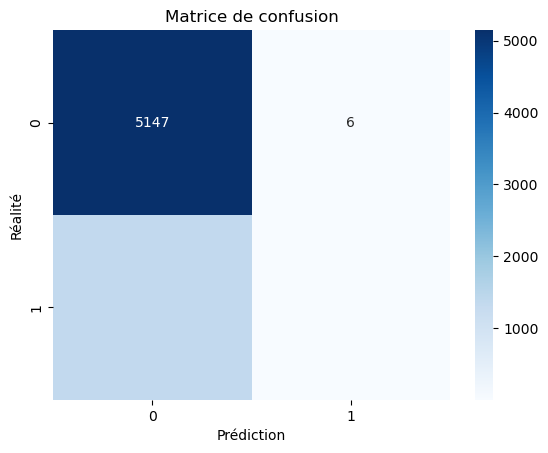

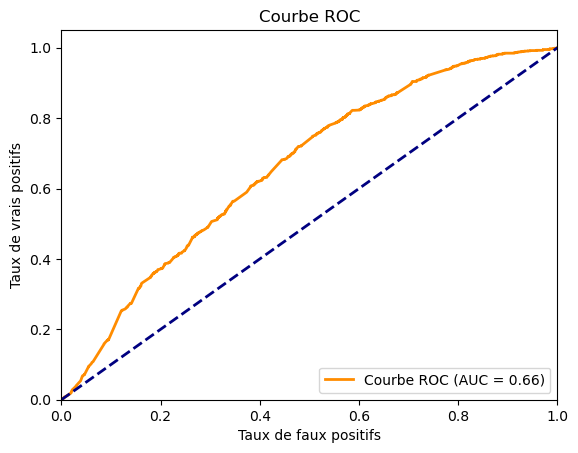

Optimization terminated successfully.
         Current function value: 0.485556
         Iterations 7

Pseudo-R2 de McFadden: 0.0631742001633766


In [795]:
# Sélection des colonnes avec corrélation 
columns_for_regression = ['FONCTION', 'CONDUITE', 'LIEUW', 'NATIO1NB', 'KMANNU', 'CSERDEB', 'STATUT']

# Séparation des données en variables prédictives (X) et variable cible (y)
X = df_filled[columns_for_regression]
y = df_filled['dependent_variable']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialisation et entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(conf_matrix)

# Calcul de l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print("\nExactitude:", accuracy)

# Rapport de classification
class_report = classification_report(y_test, y_pred)
print("\nRapport de classification:")
print(class_report)

# Courbe ROC et AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nAUC:", roc_auc)

# Visualisation de la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de confusion')
plt.show()

# Visualisation de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

# Calcul du pseudo-R2 de McFadden
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()
pseudo_r2 = 1 - (result.llf / result.llnull)
print("\nPseudo-R2 de McFadden:", pseudo_r2)

Ici la Matrice de confusion a True Negatives (TN) : 5147, False Positives (FP) : 6, False Negatives (FN) : 1354, True Positives (TP) : 1) Le modèle de prédiction est faible pour cette regression logistique.

1. La précision
La précision pour la classe 0 est de 0.79 pour la classe 0. Cela signifie que parmi toutes les prédictions positives faites par le modèle pour la classe 0, 79% étaient effectivement correctes. En d'autres termes, sur toutes les prédictions où le modèle a prédit que l'observation était de la classe 0, 79% étaient réellement de la classe 0.

La précision pour la classe 1 est de 0.14 pour la classe 1. Cela indique que parmi toutes les prédictions positives faites par le modèle pour la classe 1, 14% étaient correctes. En d'autres termes, sur toutes les prédictions où le modèle a prédit que l'observation était de la classe 1, 14% étaient effectivement de la classe 1.

2. Le recall 

Le rappel est de 1 pour la classe 0. Cela signifie que le modèle a réussi à capturer 99% de toutes les observations réelles de la classe 0. En d'autres termes, parmi toutes les observations réelles qui étaient de la classe 0, le modèle en a identifié correctement 100%.

Le rappel est de 0 pour la classe 1. Cela indique que le modèle n'a capturé aucune de toutes les observations réelles de la classe 1. En d'autres termes, sur toutes les observations réelles qui étaient de la classe 1, le modèle n'en a identifié que 0.

3. F1-Score
Le F1-score est une mesure combinée de la précision et du rappel, calculée comme la moyenne harmonique de ces deux valeurs. Il donne une mesure unique de la performance du modèle qui prend en compte à la fois les faux positifs et les faux négatifs.

Classe 0 (Non 1) : Le F1-score est de 0.88 pour la classe 0. Cela indique une bonne harmonie entre précision et rappel pour la classe 0, avec une valeur élevée indiquant un bon équilibre entre les prédictions correctes positives et négatives pour cette classe.

Classe 1 (Oui 1) : Le F1-score est de 0.00 pour la classe 1. Cela montre que le modèle n'arrive pas à trouver un équilibre entre précision et rappel pour la classe 1, ce qui est souvent dû à un faible rappel (capture des vrais positifs) dans ce cas particulier.

Le modèle de régression logistique n'explique qu'environ 4.8% de la variance dans les données. Cela indique que le modèle a une capacité limitée à prédire correctement la variable dépendante à partir des variables explicatives fournies.
Enfin, Concernant le ROC : l'AUC-ROC de 0,66 montre que le modèle a une capacité modérée à discriminer entre les classes positives et négatives. 

Selon CHATGPT, un rapport recommandé pour une regression logistique est d'avoir au moins 10 à 20 observations par variable pour un jeu de données commme le nôtre, nous allons alors réessayer une dernière fois une nouvelle regression logistique

In [796]:
# Remplacez "df_original" par le nom de votre DataFrame existant

colonnes_a_garder1 = ["AGE","ANCIENNETE", "REVMEN", "LNAISD", "SITUA",
                   "ETAMATRI", "STATUT", "CJSITUA", "CJACTOCCUP", "NBENFM3", "NBENF3A17",
                   "NBENF18P", "CLASSIF", "TYPEMPLOI", "TPP", "HH", "HSUP", "BSANTE", "AGFINETU",
                   "DIPLOME", "WHO", "REGION","CONDUITE", "LIEUW","NATIO1NB", "KMANNU", "CSERDEB","FONCTION", "dependent_variable" ]

# Créer un nouveau DataFrame avec seulement les colonnes sélectionnées
nouveau_df1 = df1[colonnes_a_garder1].copy()

In [797]:
nouveau_df1.head(4)

,AGE,ANCIENNETE,REVMEN,LNAISD,SITUA,ETAMATRI,STATUT,CJSITUA,CJACTOCCUP,NBENFM3,...,DIPLOME,WHO,REGION,CONDUITE,LIEUW,NATIO1NB,KMANNU,CSERDEB,FONCTION,dependent_variable
2,0.551410,0.526873,-0.554129,-0.287429,5.688376,0.350647,1.319774,-0.494830,0.506475,-0.415091,...,-0.468164,0.669961,-1.449227,-1.270235,NaN,NaN,-0.473408,0.159273,NaN,0
3,-0.142737,-0.018571,NaN,-0.287429,-0.117692,0.350647,2.120497,2.352232,-1.974430,-0.415091,...,-1.412255,1.279353,-1.449227,0.753948,NaN,NaN,NaN,NaN,NaN,0
6,2.038866,2.345018,-0.590809,-0.287429,-0.117692,0.350647,2.120497,-0.494830,0.506475,-0.415091,...,-1.412255,1.279353,-1.449227,-1.270235,NaN,NaN,-0.573153,NaN,NaN,0
7,0.650573,-0.018571,-1.150918,-0.287429,-0.117692,-1.358312,2.120497,2.352232,-1.974430,-0.415091,...,-1.412255,NaN,-1.449227,0.753948,NaN,NaN,NaN,NaN,NaN,0


In [798]:
nouveau_df1.shape

(21693, 29)

In [799]:
nouveau_df1.columns

Index(['AGE', 'ANCIENNETE', 'REVMEN', 'LNAISD', 'SITUA', 'ETAMATRI', 'STATUT',
       'CJSITUA', 'CJACTOCCUP', 'NBENFM3', 'NBENF3A17', 'NBENF18P', 'CLASSIF',
       'TYPEMPLOI', 'TPP', 'HH', 'HSUP', 'BSANTE', 'AGFINETU', 'DIPLOME',
       'WHO', 'REGION', 'CONDUITE', 'LIEUW', 'NATIO1NB', 'KMANNU', 'CSERDEB',
       'FONCTION', 'dependent_variable'],
      dtype='object')

In [800]:
valeurs_manquantes = nouveau_df1.isnull().sum()
colonnes_manquantes = valeurs_manquantes[valeurs_manquantes > 0]
if colonnes_manquantes.empty:
    print("Aucune colonne ne contient de valeurs manquantes.")
else:
    print("Colonnes avec des valeurs manquantes :")
    print(colonnes_manquantes)

Colonnes avec des valeurs manquantes :
ANCIENNETE       25
REVMEN          343
SITUA             3
CJSITUA           3
CJACTOCCUP        3
CLASSIF        1700
TYPEMPLOI      1701
TPP             179
HH              320
AGFINETU        217
WHO            1390
REGION           48
LIEUW          1682
NATIO1NB      21635
KMANNU        14347
CSERDEB        7353
FONCTION       1702
dtype: int64


On remplace par la moyenne pour les valeurs qui correspondent à des chiffres entiers correspondant à une valeur réelle.

In [801]:
# Liste des colonnes à traiter
cols_to_process = ['REVMEN', 'HH', 'AGE', 'ANCIENNETE', 'AGFINETU', 'WHO', 'TPP',]
# Remplacer les valeurs NaN par la moyenne pour les colonnes spécifiées
for col in cols_to_process:
    if col in nouveau_df1.columns:
        nouveau_df1.loc[:, col] = nouveau_df1[col].fillna(nouveau_df1[col].mean())

In [802]:
valeurs_manquantes = nouveau_df1.isnull().sum()
colonnes_manquantes = valeurs_manquantes[valeurs_manquantes > 0]
if colonnes_manquantes.empty:
    print("Aucune colonne ne contient de valeurs manquantes.")
else:
    print("Colonnes avec des valeurs manquantes :")
    print(colonnes_manquantes)

Colonnes avec des valeurs manquantes :
SITUA             3
CJSITUA           3
CJACTOCCUP        3
CLASSIF        1700
TYPEMPLOI      1701
REGION           48
LIEUW          1682
NATIO1NB      21635
KMANNU        14347
CSERDEB        7353
FONCTION       1702
dtype: int64


Tandis que ici, on souhaite remplacer les données par les valeurs les plus fréquentes car les données sont issues d'un questionnaire

In [803]:
# Liste des colonnes à traiter
colonnes_a_traiter = [
    'REGION', 'TYPEMPLOI', 'CJACTOCCUP', 'CJSITUA', 'SITUA',  'CLASSIF'
]

# Remplacement des valeurs manquantes par les valeurs les plus fréquentes
for col in colonnes_a_traiter:
    valeur_la_plus_frequente = nouveau_df1[col].mode()[0]  # Mode (valeur la plus fréquente) de la colonne
    nouveau_df1[col].fillna(valeur_la_plus_frequente, inplace=True)


In [804]:
valeurs_manquantes = nouveau_df1.isnull().sum()
colonnes_manquantes = valeurs_manquantes[valeurs_manquantes > 0]
if colonnes_manquantes.empty:
    print("Aucune colonne ne contient de valeurs manquantes.")
else:
    print("Colonnes avec des valeurs manquantes :")
    print(colonnes_manquantes)

Colonnes avec des valeurs manquantes :
LIEUW        1682
NATIO1NB    21635
KMANNU      14347
CSERDEB      7353
FONCTION     1702
dtype: int64


In [805]:
# Liste des colonnes à traiter
colonnes_a_traiter1 = [
    'LIEUW', 'NATIO1NB','CSERDEB', 'FONCTION'
]

# Remplacement des valeurs manquantes par les valeurs les plus fréquentes
for col in colonnes_a_traiter1:
    valeur_la_plus_frequente = nouveau_df1[col].mode()[0]  # Mode (valeur la plus fréquente) de la colonne
    nouveau_df1[col].fillna(valeur_la_plus_frequente, inplace=True)


In [806]:
# Liste des colonnes à traiter
cols_to_process3 = ['KMANNU']
# Remplacer les valeurs NaN par la moyenne pour les colonnes spécifiées
for col in cols_to_process3:
    if col in nouveau_df1.columns:
        nouveau_df1.loc[:, col] = nouveau_df1[col].fillna(nouveau_df1[col].mean())

In [807]:
valeurs_manquantes = nouveau_df1.isnull().sum()
colonnes_manquantes = valeurs_manquantes[valeurs_manquantes > 0]
if colonnes_manquantes.empty:
    print("Aucune colonne ne contient de valeurs manquantes.")
else:
    print("Colonnes avec des valeurs manquantes :")
    print(colonnes_manquantes)

Aucune colonne ne contient de valeurs manquantes.


In [808]:
# Liste des colonnes à normaliser
columns_to_normalize = ["AGE","ANCIENNETE", "REVMEN", "LNAISD", "SITUA",
                   "ETAMATRI", "STATUT", "CJSITUA", "CJACTOCCUP", "NBENFM3", "NBENF3A17",
                   "NBENF18P", "CLASSIF", "TYPEMPLOI", "TPP", "HH", "HSUP", "BSANTE", "AGFINETU",
                   "DIPLOME", "WHO", "REGION","CONDUITE", "LIEUW","NATIO1NB", "KMANNU", "CSERDEB","FONCTION"]

# Assurez-vous que les colonnes existent dans le DataFrame
existing_columns = [col for col in columns_to_normalize if col in nouveau_df1.columns]

# Afficher un avertissement si certaines colonnes sont manquantes
missing_columns = set(columns_to_normalize) - set(existing_columns)
if missing_columns:
    print(f"Les colonnes suivantes sont manquantes dans le DataFrame : {missing_columns}")

# Initialiser le StandardScaler
scaler = StandardScaler()

# Normaliser les colonnes existantes
nouveau_df1[existing_columns] = scaler.fit_transform(nouveau_df1[existing_columns])

Nous choisissons de mettre 20 variables explicatives pour améliorer notre modèle. Selon nos informations, c'est le nombre de données maximums. On modifie ici le test_size à 20 pour essayer d'obtenir une valeur de 0,70 afin que notre modèle soit performant:
C'est à dire que 80% des données pour l'entraînement et 20% pour le test.

Matrice de confusion:
[[3373   45]
 [ 883   38]]

Exactitude: 0.7861258354459553

Rapport de classification:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3418
           1       0.46      0.04      0.08       921

    accuracy                           0.79      4339
   macro avg       0.63      0.51      0.48      4339
weighted avg       0.72      0.79      0.71      4339


AUC: 0.6976449644819628


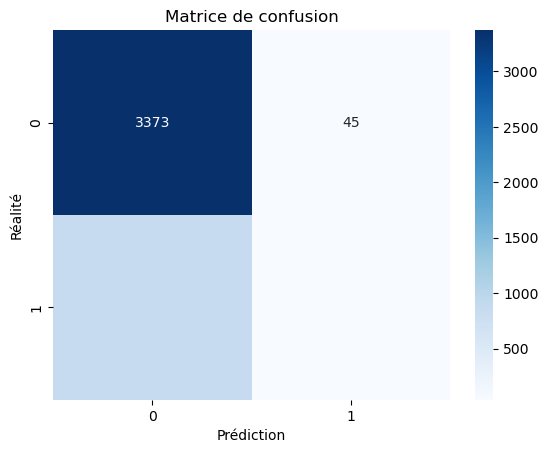

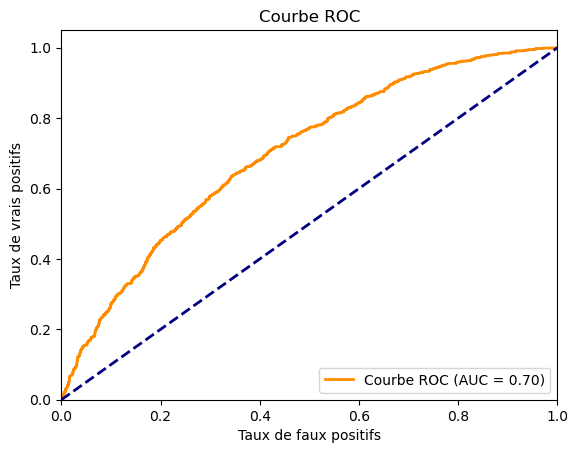

Optimization terminated successfully.
         Current function value: 0.472624
         Iterations 7

Pseudo-R2 de McFadden: 0.08430492189499728


In [809]:
# Sélection des colonnes avec corrélation
columns_for_regression = ['FONCTION', 'CONDUITE', 'CLASSIF', 'LIEUW','NATIO1NB', 'KMANNU', 'CSERDEB', 'CJACTOCCUP', 'CLASSIF', 'CJSITUA','DIPLOME','ANCIENNETE','AGFINETU', 'STATUT', 'LNAISD', 'BSANTE', 'TYPEMPLOI', 'WHO', "ETAMATRI", "AGE"]

# Séparation des données en variables prédictives (X) et variable cible (y)
X = nouveau_df1[columns_for_regression]
y = nouveau_df1['dependent_variable']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation et entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(conf_matrix)

# Calcul de l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print("\nExactitude:", accuracy)

# Rapport de classification
class_report = classification_report(y_test, y_pred)
print("\nRapport de classification:")
print(class_report)

# Courbe ROC et AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nAUC:", roc_auc)

# Visualisation de la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de confusion')
plt.show()

# Visualisation de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

# Calcul du pseudo-R2 de McFadden
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()
pseudo_r2 = 1 - (result.llf / result.llnull)
print("\nPseudo-R2 de McFadden:", pseudo_r2)

In [810]:
nouveau_df1.shape

(21693, 29)

Ici la Matrice de confusion a True Negatives (TN) : 3373, False Positives (FP) : 7, False Negatives (FN) : 883, True Positives (TP) : 38) Le modèle de prédiction est faible pour cette regression logistique.

1. La précision
La précision pour la classe 0 est de 0.79 pour la classe 0. Cela signifie que parmi toutes les prédictions positives faites par le modèle pour la classe 0, 79% étaient effectivement correctes. En d'autres termes, sur toutes les prédictions où le modèle a prédit que l'observation était de la classe 0, 79% étaient réellement de la classe 0.

La précision pour la classe 1 est de 0.44 pour la classe 1. Cela indique que parmi toutes les prédictions positives faites par le modèle pour la classe 1, 44% étaient correctes. En d'autres termes, sur toutes les prédictions où le modèle a prédit que l'observation était de la classe 1, 44% étaient effectivement de la classe 1. Ici la précision est beaucoup mieux que les autres régressions ainsi cela est plutôt positif.

Le recall et le f1-score enregistre les mêmes informations que les regressions logistiques précédentes.
Le modèle de régression logistique n'explique qu'environ 0,09 de la variance dans les données. Cela indique que le modèle a une capacité limitée à prédire correctement la variable dépendante à partir des variables explicatives fournies. Même si elle est meilleure elle n'est pas la plus optimale.

Concernant le ROC : l'AUC-ROC de 0,70 montre que le modèle a une capacité modérée à discriminer entre les classes positives et négatives. C'est un indicateur positif, mais il peut y avoir encore de la place pour améliorer les performances du modèle. Ainsi, selon https://www.xlstat.com/fr/solutions/fonctionnalites/arbres-de-classification-et-de-regression, On considère habituellement que le modèle est bon dès lors que la valeur de l'AUC est supérieure à 0.7. Nous sommes donc satisfaits de notre résultat car l'AUC.

Ainsi au regard du modèle 1 :

taille de la population : environ 5000
précision : 0.45
f1-score (=rappel) : 0.03

modèle 3 :

taille de la population : environ 3000
précision : 0.44
f1-score (=rappel) : 0.07

==> l'ajout de 20 variables supplémentaire a permis d'améliorer la capacité à discriminer entre  classes positives et négatives. Le modèle est capable de détecter plus de vrais positifs que ce que le hasard permettrait. (AUC plus élevé de 0,7 pour le troisième modèle contre 0,64 pour le premier modèle). Cependant ni la précision, ni le rappel n'a correctement été amélioré. Par conséquent, au regard de nos données et des variables choisies, nous sommes en mesure de savoir quelles sont les femmes qui ne sont pas apporteuse de ressources. Cependant, nous ne sommes pas en mesure au regard de nos données d'affirmer s'il y a davantage de femmes qui sont apporteuses de ressources dans notre jeu de données étudié

Conclusion: Il sera difficile à un modèle de prédire les variables explicatives car le questionnaire concerne les conditions de travail et non des informations liées à sa condition financière pour vivre. Ainsi, dans notre jeu de données, Les femmes apporteurs de ressources étant minoritaires sur ce jeu de données, on pourrait pu essayer d'augmenter l'échantillon de ce dataframe pour pouvoir obtenir une meilleure prédiction sur notre regression logistique mais nous avons préféré rester sur nos données de notre jeu pour éviter de biaiser le résultat. 